In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# INTRODUCTION

# Problem Description

# Background and Context
Loan defaults present a challenge, for banks and financial institutions leading to financial losses and impacting the overall economic well being of a country. Each year banks face losses amounting to sums due to customers failing to repay their loans. This has an effect on the economy hindering both its growth and stability.

To tackle this issue this study focuses on utilizing data driven approaches to anticipate loan defaulters. By analyzing characteristics of loan applicants such as the amount funded, geographical location, remaining loan balance, credit history and more the study aims to develop a model. The model will be designed to evaluate individuals creditworthiness and forecast whether they are likely to default on their loans.

The insights extracted from this model hold value for banks and financial institutions. By identifying loan defaulters before granting credit banks can proactively manage risks. Minimize financial losses. This will enable them to make cautious lending decisions while ensuring that credit is extended primarily to those who are most likely to fulfill their repayment obligations.

In addition to safeguarding the interests of institutions the findings from this study can have implications, for the broader economy as well. By reducing instances of loan defaults banks can operate with efficiency. Allocate resources more effectively.Consequently this will help create a atmosphere, for lending allowing a greater number of deserving individuals and businesses to access loans. As a result the findings of this study can play a role, in boosting growth and ensuring stability in the sector.

# METHODS

# Problem Statement
Building a predictive model for loan default prediction using a loan dataset.

# Dataset

The dataset is taken from https://www.kaggle.com/datasets/hemanthsai7/loandefault.

The dataset contains 96376 entries and 35 columns. Each row represents an individual loan entry, and the columns provide various information related to the loan applicants and their loan details. The dataset includes a mix of numeric (int64 and float64) and categorical (object) columns.

Description of some important columns:

ID: Identifier for each loan entry.

Loan Amount: The amount of the loan applied for.

Funded Amount: The actual funded amount by the lender.

Funded Amount Investor: The funded amount by investors.

Term: The loan term in months.

Batch Enrolled: Batch enrollment identifier (categorical).

Interest Rate: The interest rate for the loan.

Grade: Loan grade (categorical).

Sub Grade: Loan subgrade (categorical).

Employment Duration: Employment duration (categorical).

Home Ownership: Type of home ownership (categorical).

Verification Status: Verification status (categorical).

Payment Plan: Payment plan indicator (categorical).

Loan Title: Title of the loan (categorical).

Debit to Income: The debt-to-income ratio.

Delinquency - two years: Number of delinquencies in the past two years.

Inquiries - six months: Number of inquiries in the past six months.

Open Account: Number of open accounts.

Public Record: Number of public records.

Revolving Balance: The revolving balance.

Revolving Utilities: The revolving utilities.

Total Accounts: Total number of accounts.

Initial List Status: Initial listing status (categorical).

Total Received Interest: Total received interest on the loan.

Total Received Late Fee: Total received late fee on the loan.

Recoveries: Amount recovered after default.

Collection Recovery Fee: Collection recovery fee.

Collection 12 months Medical: Number of medical collections in the past 12 months.

Application Type: Type of application (categorical).

Last week Pay: The last week's payment.

Accounts Delinquent: Number of delinquent accounts.

Total Collection Amount: Total collection amount.

Total Current Balance: Total current balance.

Total Revolving Credit Limit: Total revolving credit limit.

Loan Status: The target variable - whether the loan defaulted or not (1 for default, 0 for non-default

**Target Variable: Loan Status**

# Problem Type : Classification task

**Selected algorithms:**
* XGBoost
* random forest
* neural network

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


#  LOADING DATASET

In [ ]:
# Load the datasets into Pandas DataFrames
#df = pd.read_csv('/kaggle/input/loandefault/train.csv')
#test_df= pd.read_csv('/kaggle/input/loandefault/test.csv')
#df = pd.read_csv('/content/drive/MyDrive/credit_train.csv')
#test_df= pd.read_csv('/content/drive/MyDrive/credit_test.csv')
df = pd.read_csv('/content/train.csv')
test_df= pd.read_csv('/content/test.csv')


# DATA SANITY CHECKS

In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

****The dataset has 67463 rows and 35 columns****

In [ ]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include='object')

# Get all non-categorical columns
non_categorical_columns = df.select_dtypes(exclude='object')

# Alternatively, you can get the numeric (non-categorical) columns using the 'number' argument
# non_categorical_columns = df.select_dtypes(include='number')

# Get the total number of categorical columns
num_categorical_columns = len(categorical_columns.columns)

# Get the total number of non-categorical columns
num_non_categorical_columns = len(non_categorical_columns.columns)

print("Total Categorical Columns:", num_categorical_columns)
print("Categorical Columns:", categorical_columns.columns.tolist())

print("\nTotal Non-Categorical Columns:", num_non_categorical_columns)
print("Non-Categorical Columns:", non_categorical_columns.columns.tolist())

Total Categorical Columns: 9
Categorical Columns: ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']

Total Non-Categorical Columns: 26
Non-Categorical Columns: ['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


In [ ]:
#check for missing variables
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [ ]:
#check for duplicate
df.duplicated().sum()

0

In [ ]:
# Get only the categorical columns
categorical_columns = df.select_dtypes(include='object')

# Use the 'describe()' method for categorical columns
categorical_columns.describe()


,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


* Loan title has the highest distinct catagories of 109. Credit card refinancing' is the most common loan title, occurring 30728 times.
* There is only one unique payment plan in the dataset, meaning that all loans have the same payment plan.
* There are three unique verification status categories for the loan applications
* There are only three unique employment durations. MORTGAGE' is the most common employment duration category, appearing 36,531 times.

In [ ]:
# Loop over the categorical columns and print unique values along with their counts
for column in categorical_columns.columns:
    unique_values = df[column].unique()
    print(f'Categories in "{column}" are: {unique_values}')
    print(df[column].value_counts())
    print('-' * 100)

Categories in "Batch Enrolled" are: ['BAT2522922' 'BAT1586599' 'BAT2136391' 'BAT2428731' 'BAT5341619'
 'BAT4694572' 'BAT4808022' 'BAT2558388' 'BAT2078974' 'BAT2252229'
 'BAT2333412' 'BAT5849876' 'BAT2833642' 'BAT2803411' 'BAT5525466'
 'BAT5714674' 'BAT2003848' 'BAT4722912' 'BAT3873588' 'BAT1780517'
 'BAT4271519' 'BAT5811547' 'BAT1184694' 'BAT4136152' 'BAT3193689'
 'BAT1467036' 'BAT2575549' 'BAT4351734' 'BAT1104812' 'BAT5924421'
 'BAT1930365' 'BAT1766061' 'BAT5489674' 'BAT3865626' 'BAT5629144'
 'BAT5547201' 'BAT224923' 'BAT3726927' 'BAT3461431' 'BAT1761981'
 'BAT1135695']
BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1

In [ ]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


The average loan amount is approximately $16,848, with a minimum loan amount of $1,014 and a   maximum of $35,000.


The average interest rate is approximately 11.84%   with a minimum rate of 5.32 and a maximum rate of 27.18%.


On average, customers have received approximately $1.14  in late fees,  but  the  maximum  late  fee  amount is $42.62,.

# DATA CLEANSING

In [ ]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

The dataset is now clean. There are no more missing values.

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis:

In [ ]:
# Calculate percentage for each 'Loan Status' category
status_percentage = (df['Loan Status'].value_counts() / len(df)) * 100
print(status_percentage)

0    90.749003
1     9.250997
Name: Loan Status, dtype: float64


* 90.75% of the loan entries are non-defaulted loans (Loan Status = 0), while only 9.25% are defaulted loans (Loan Status = 1).

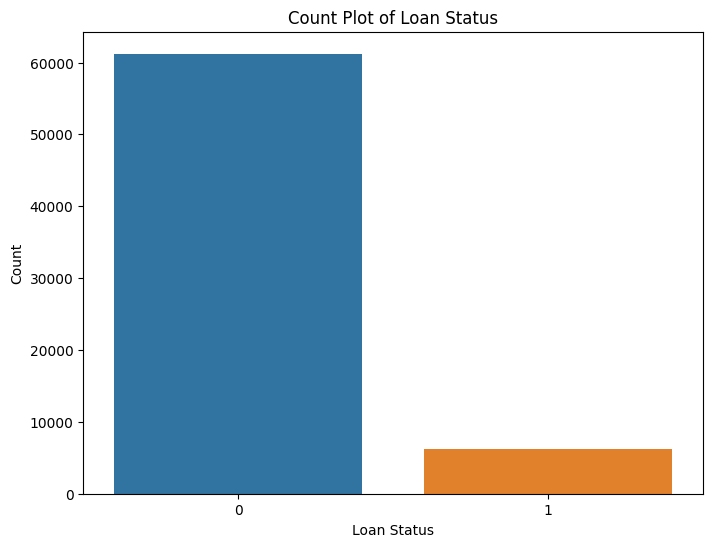

In [ ]:
# Plot count plot for 'Loan Status' with percentages as labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Loan Status')
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')


plt.show()

* There is an huge imbalance on the loan entries.
* The nondefaulted class takes a huge part as compared to the defaulted loans.

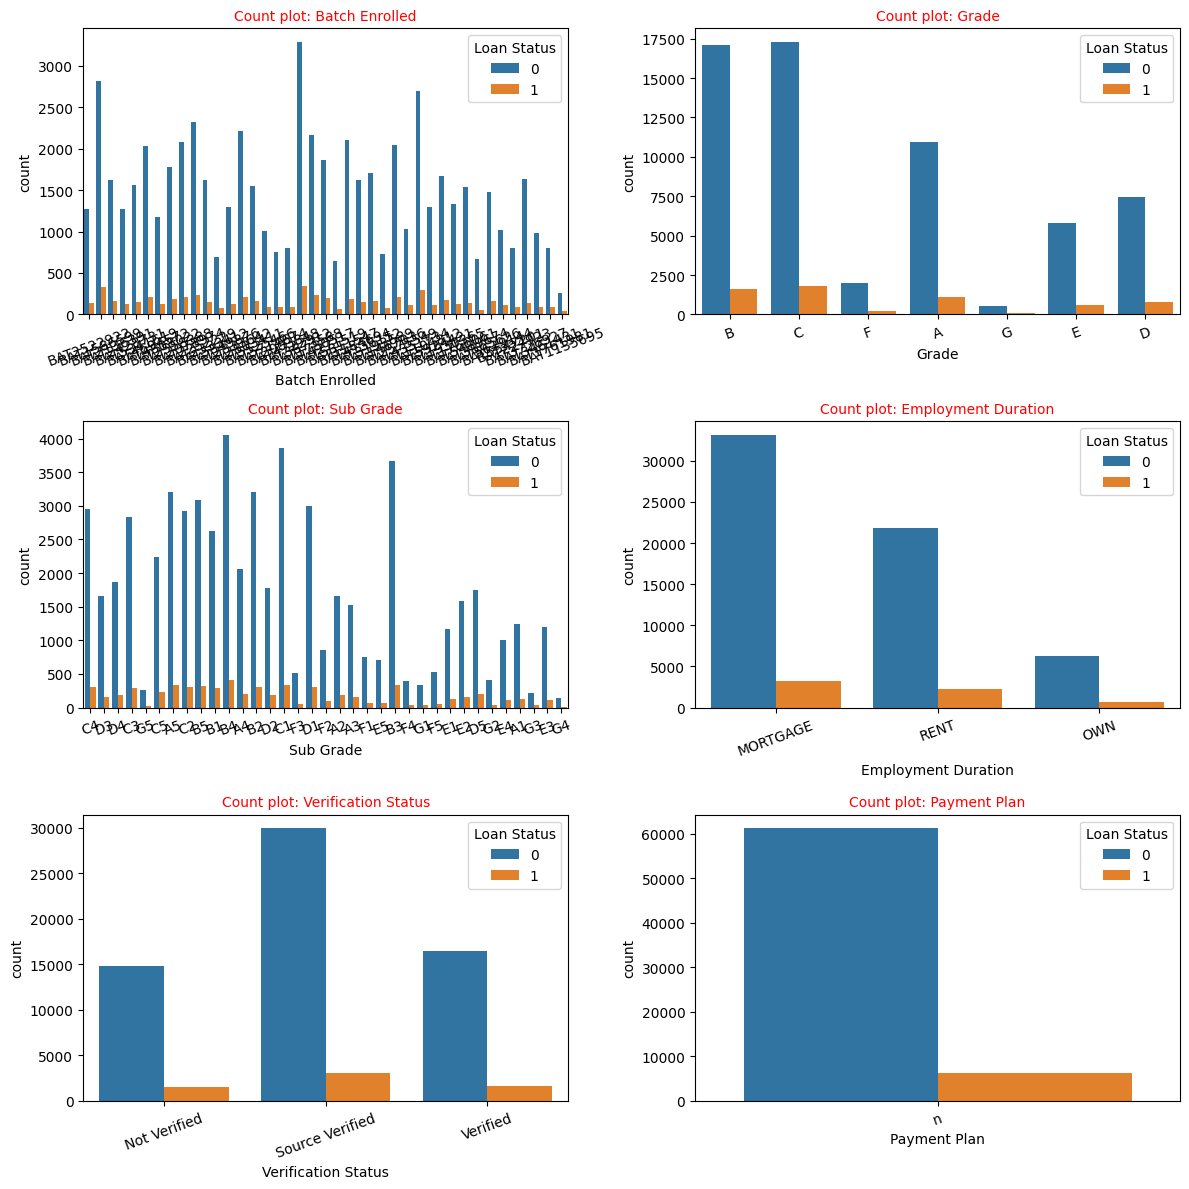

In [ ]:
# Get a list of all categorical columns in the DataFrame
cat_col = list(df.select_dtypes(include='object').columns)

# Select the first 6 categorical columns (you can adjust this based on your preference)
cat_col_subset = cat_col[:6]

# Set up the figure size for the entire grid of plots
plt.figure(figsize=(12, 12))

# Loop through each selected categorical column and create a subplot for the count plot
for i in range(len(cat_col_subset)):
    # Create a subplot with 3 rows, 2 columns, and index (i+1)
    plt.subplot(3, 2, (i+1))

    # Plot the count plot for "Loan Status" against the current categorical column
    sns.countplot(data=df, x=cat_col_subset[i], hue='Loan Status')  # Update 'loan_status' to 'Loan Status'

    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=20)

    # Set the x-axis label to the current categorical column name
    plt.xlabel("{}".format(cat_col_subset[i]))

    # Set the title of the subplot to indicate the column being plotted
    plt.title("Count plot: {}".format(cat_col_subset[i]), fontsize=10, color='red')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


**Observations**

In the feature variable verification status, source verified are likely to default the loan.

in the feature variable employment duration, mortgage has a higher count of defaulters.

There are more students with loans in Grade C

# Discrete Numerical Analysis

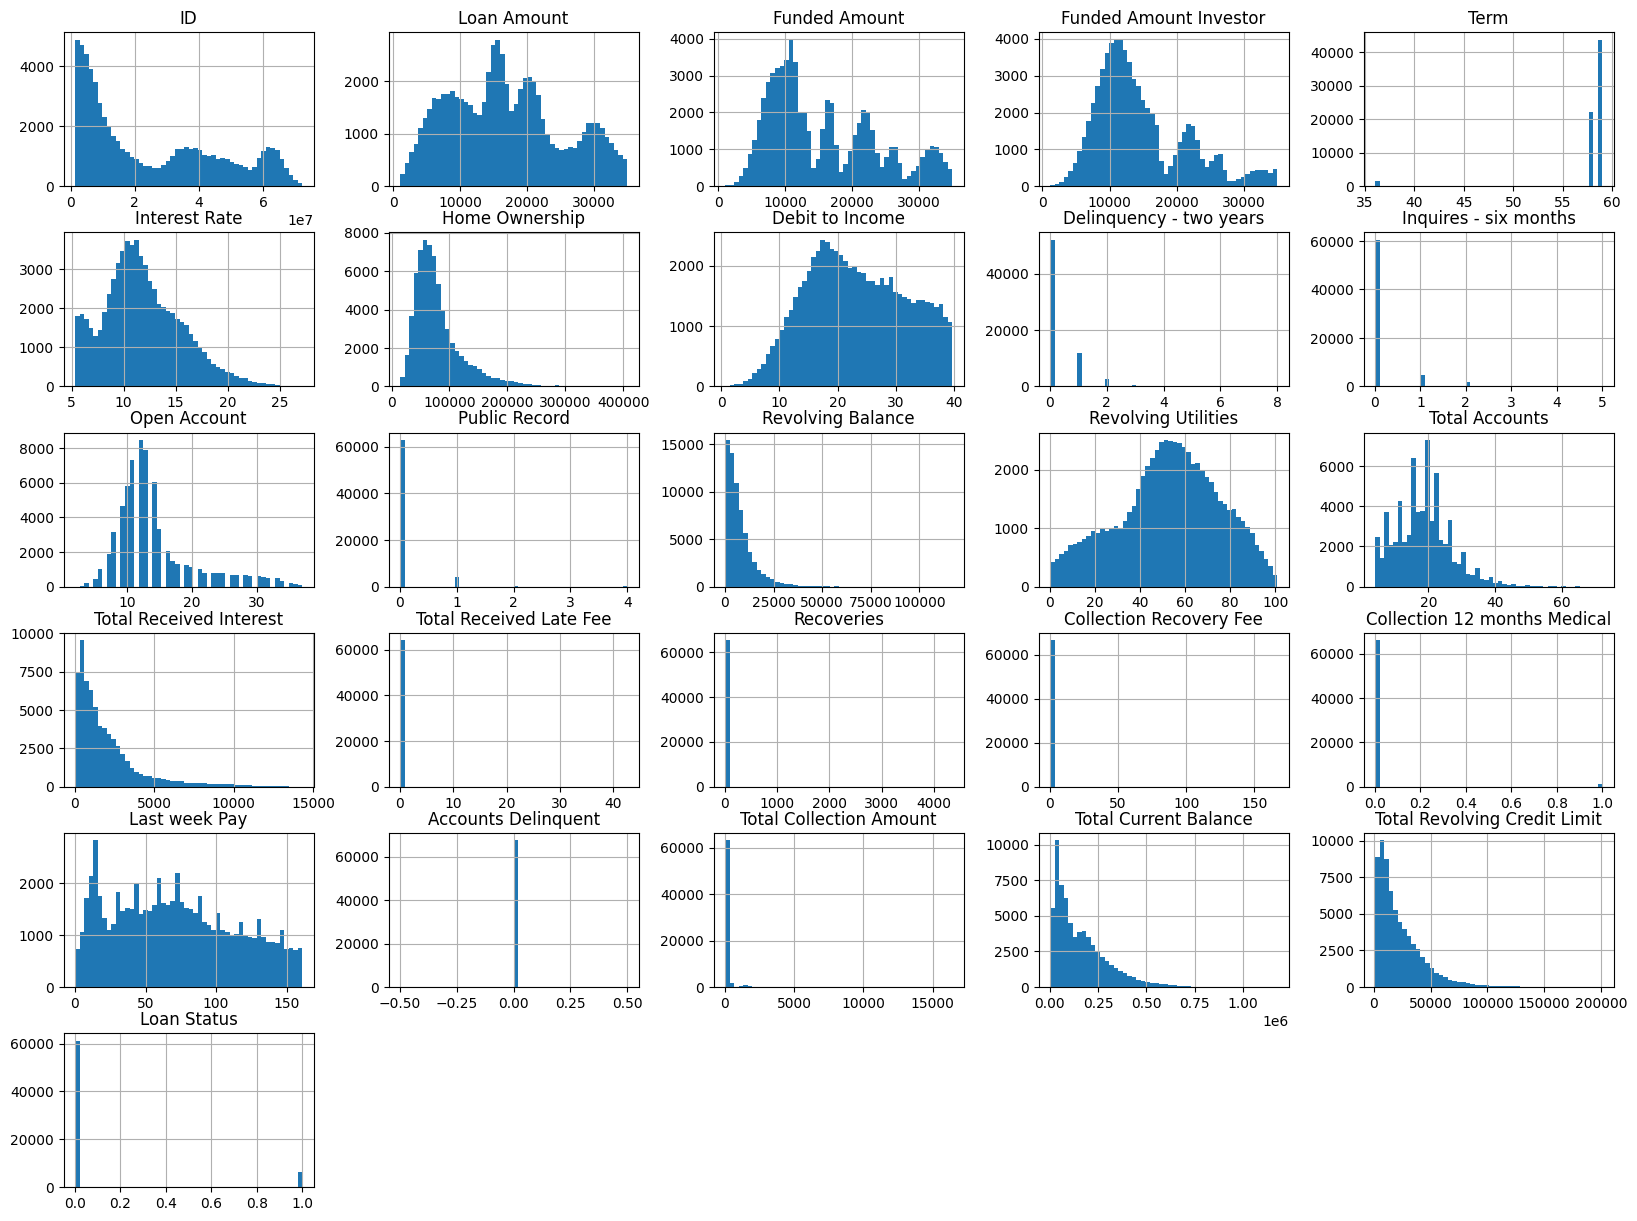

In [ ]:
# checking the distribution of the variables
df.hist(bins=50,figsize=(20,15))
plt.show()

**Observations**
* The distribution is a normal distribution in the columns loan amount, funded amount, funded amount investor , interst rate, loan status, Revolving utilities and last week pay.
* The distribution is normal suggesting that the data is not too skewed. This means that the outliers are not too far away from the mean, and that the distribution is fairly symmetrical.

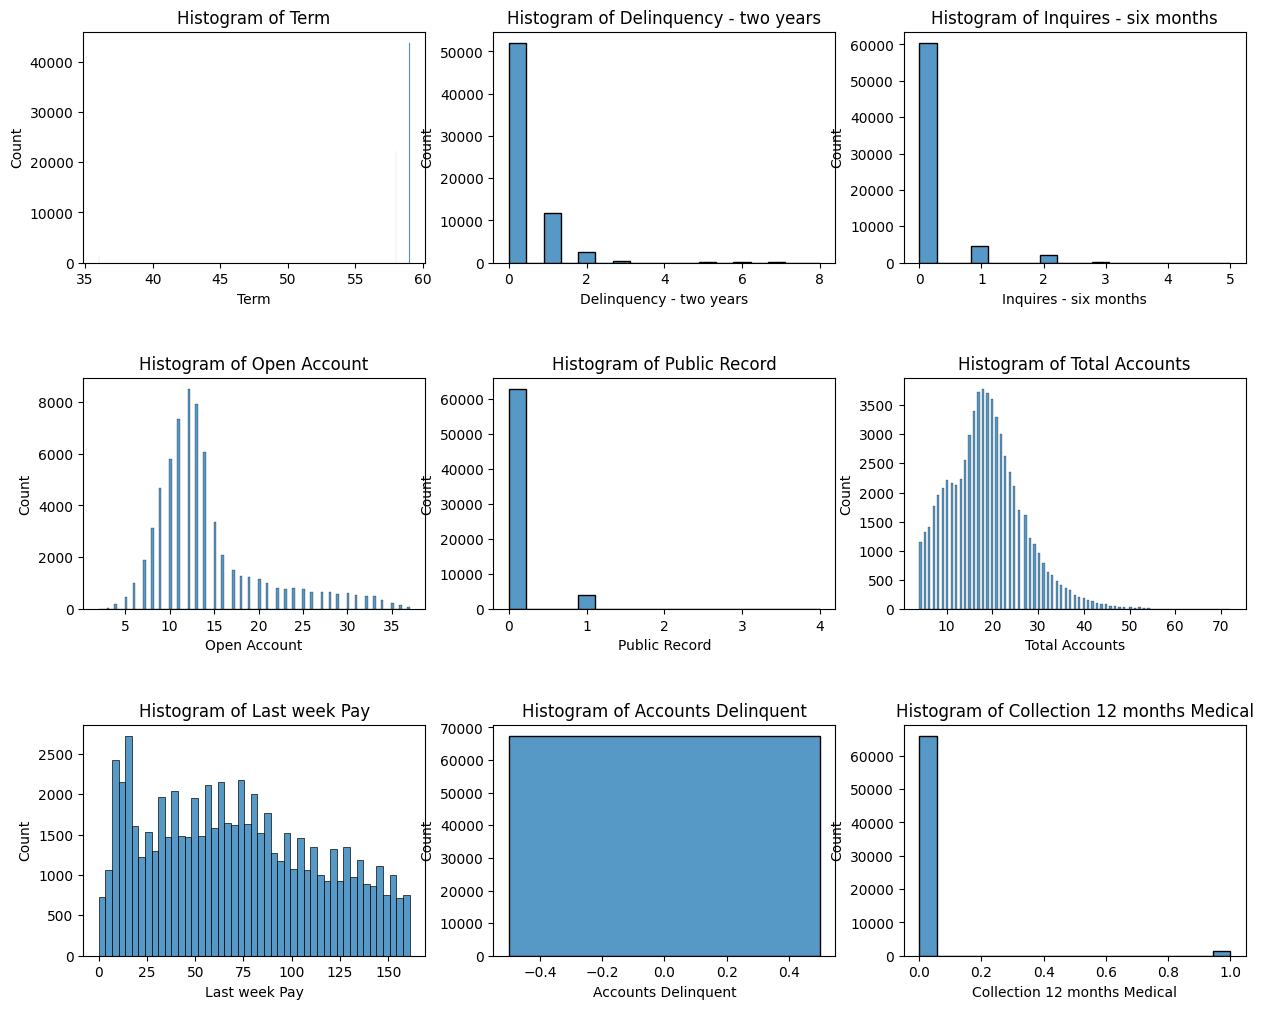

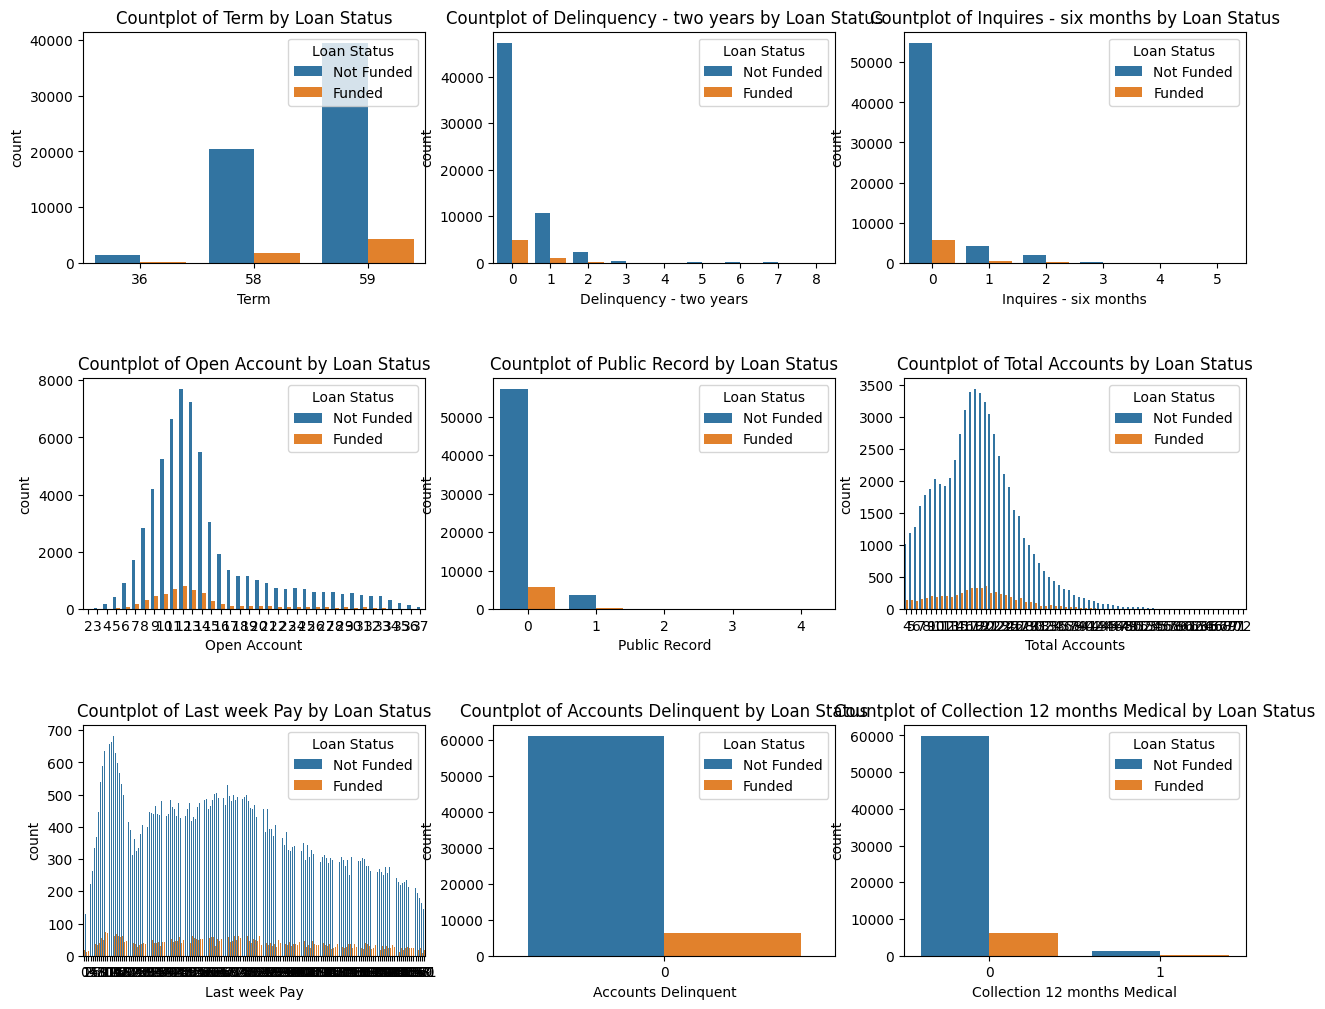

In [ ]:
# List of discrete numerical variables to analyze
discrete_num_cols = ['Term', 'Delinquency - two years', 'Inquires - six months', 'Open Account',
                     'Public Record', 'Total Accounts', 'Last week Pay', 'Accounts Delinquent',
                     'Collection 12 months Medical']

# Setting plot grid size
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each of the discrete numerical variables
for i, col in enumerate(discrete_num_cols):
    sns.histplot(data=df, x=col, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Histogram of {col}")
    axes[i // 3, i % 3].set_xlabel(col)

plt.show()

# Plot count plots for each of the discrete numerical variables against Loan Status
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(discrete_num_cols):
    sns.countplot(data=df, x=col, hue='Loan Status', ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Countplot of {col} by Loan Status")
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].legend(title='Loan Status', loc='upper right', labels=['Not Funded', 'Funded'])

plt.show()

Two years deliquency

# 3. Continous Variables Analysis


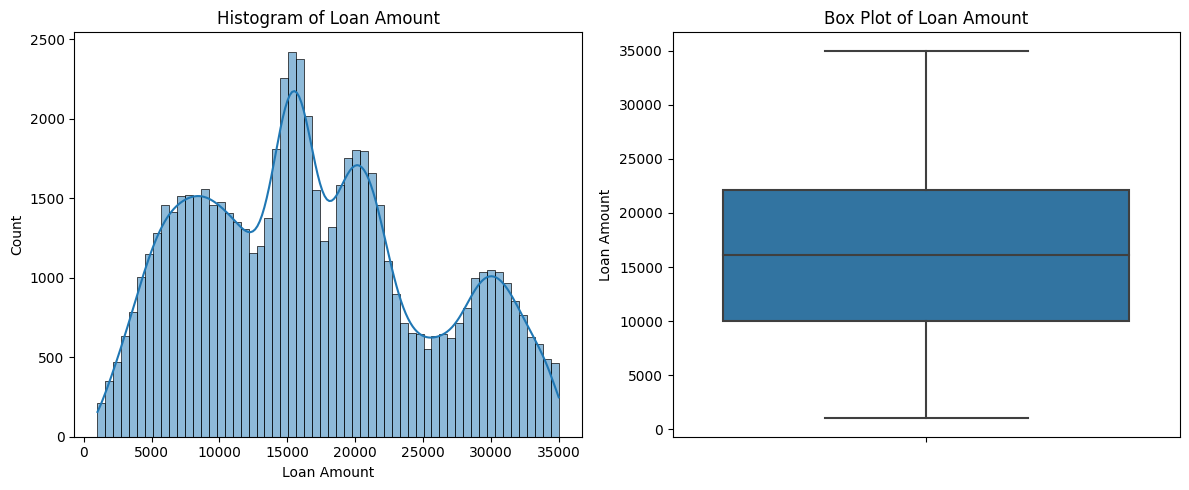

In [ ]:

# Plot histogram for 'Loan Amount'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Loan Amount', kde=True)
plt.title('Histogram of Loan Amount')

# Plot box plot for 'Loan Amount'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Loan Amount')
plt.title('Box Plot of Loan Amount')

plt.tight_layout()
plt.show()



* The variable "Loan Amount" in the dataset is evenly distributed, with no significant skewness observed.
* Additionally, there are no outliers present in the data for this variable.
* The absence of outliers indicates that the loan amounts requested by applicants are within a reasonable range and do not deviate significantly from the majority of the data.

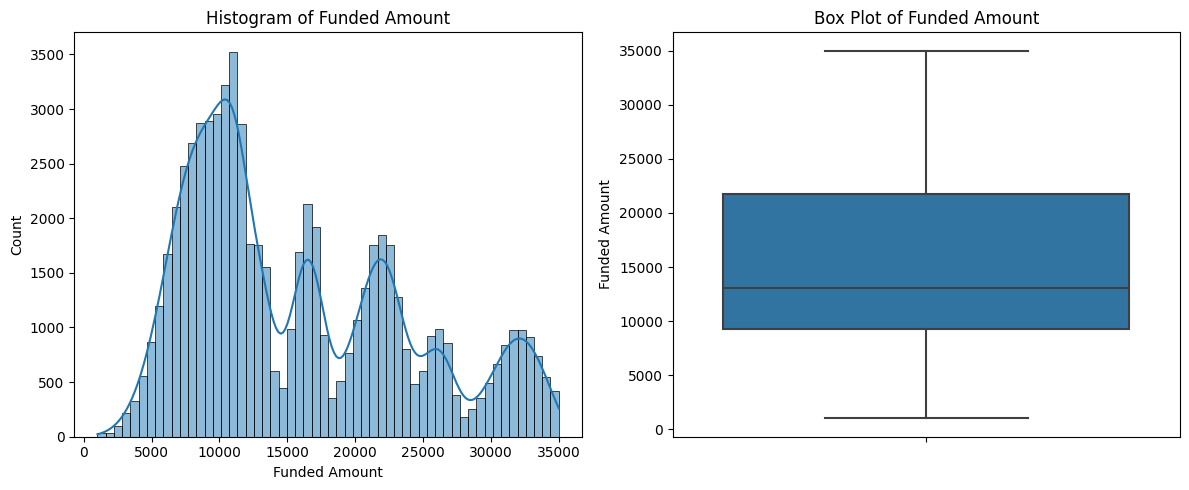

In [ ]:
# Plot histogram for 'Funded Amount'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Funded Amount', kde=True)
plt.title('Histogram of Funded Amount')

# Plot box plot for 'Funded Amount'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Funded Amount')
plt.title('Box Plot of Funded Amount')

plt.tight_layout()
plt.show()

**Observation**
* The distribution of funded amounts for defaulted loans is skewed to the right, which means that there are more defaulted loans with larger funded amounts. This suggests that borrowers who took out larger loans are more likely to default.
* There are few outliers in the distribution of funded amounts.

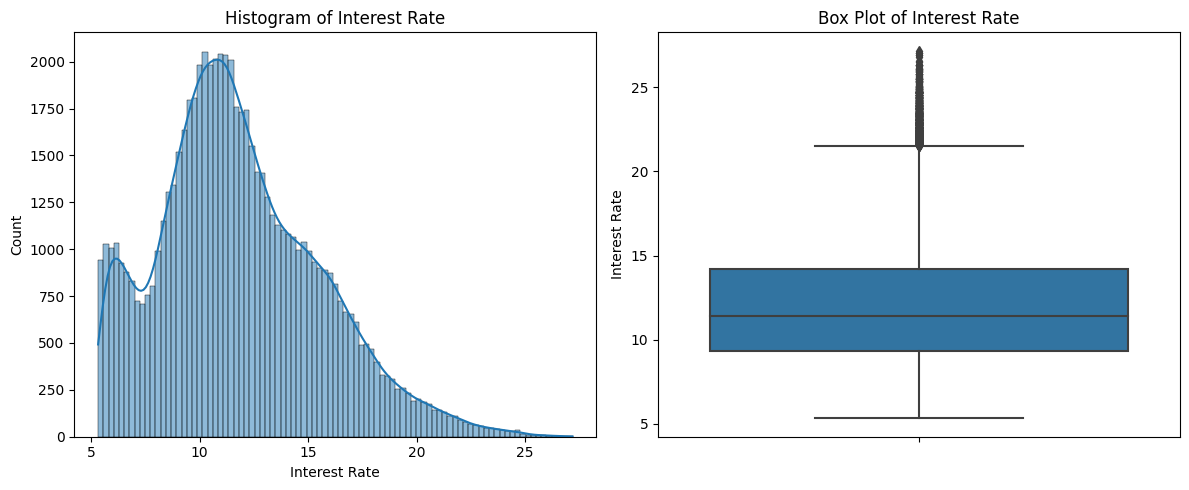

In [ ]:
# Plot histogram for 'Interest Rate'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Interest Rate', kde=True)
plt.title('Histogram of Interest Rate')

# Plot box plot for 'Interest Rate'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Interest Rate')
plt.title('Box Plot of Interest Rate')

plt.tight_layout()
plt.show()

**Observation**
* There are some few outliers.
* The distribution is skewed to the right.

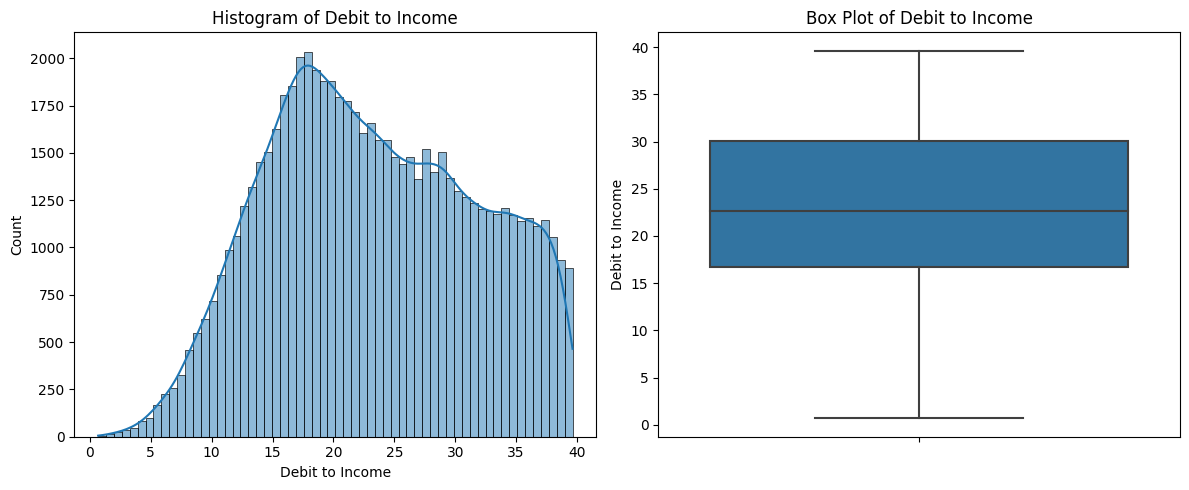

In [ ]:
# Plot histogram for 'Debit to Income'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Debit to Income', kde=True)
plt.title('Histogram of Debit to Income')

# Plot box plot for 'Debit to Income'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Debit to Income')
plt.title('Box Plot of Debit to Income')

plt.tight_layout()
plt.show()

**Observation**
*
There is a normal distribution

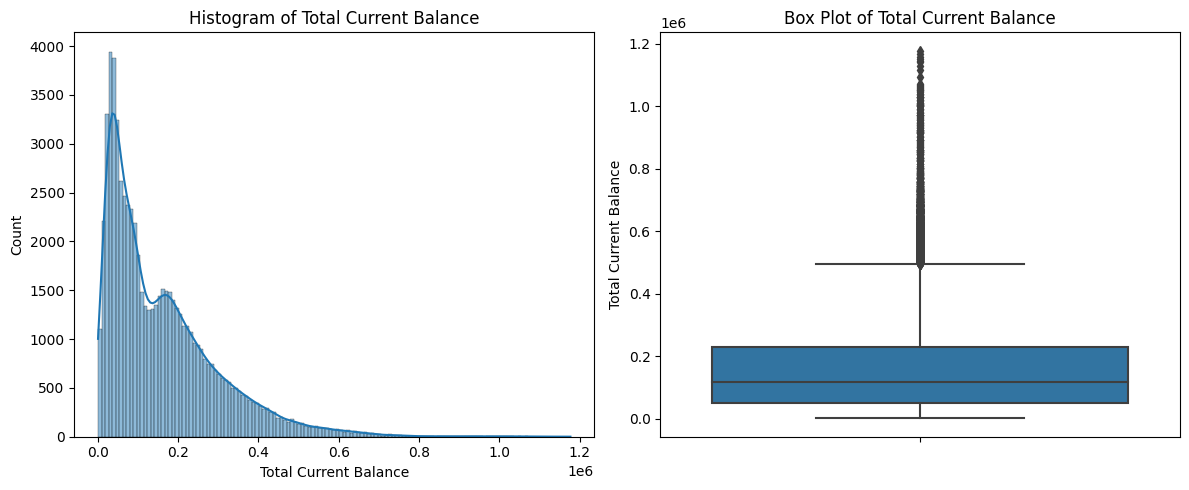

In [ ]:
# Plot histogram for 'Total Current Balance'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Total Current Balance', kde=True)
plt.title('Histogram of Total Current Balance')

# Plot box plot for 'Total Current Balance'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Total Current Balance')
plt.title('Box Plot of Total Current Balance')

plt.tight_layout()
plt.show()


**Observations**
* The distribution is highly skewed to the left

# Bivariate Analysis


In [ ]:
#checking correlation
df.corr()

<ipython-input-24-7c97667aa7ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.003480,-0.003302,0.002954,0.003226,0.004258,-0.004390,-0.010578,0.000568,-0.006628,...,0.006674,-0.001435,-0.001802,-0.002900,0.000907,NaN,0.003745,-0.003572,-0.005141,0.000472
Loan Amount,-0.003480,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,...,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,NaN,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.003302,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,...,0.001542,0.000462,0.000175,0.001071,-0.003476,NaN,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002954,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,...,-0.000232,0.000966,-0.007272,0.001814,0.004248,NaN,0.006862,0.003283,0.005669,-0.000091
Term,0.003226,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,...,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,NaN,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,0.004258,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,...,0.003119,0.009348,0.001281,-0.009895,-0.012652,NaN,0.002771,-0.002567,0.016651,0.002900
Home Ownership,-0.004390,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,...,0.004011,0.004399,-0.003821,-0.002639,-0.004573,NaN,0.006314,0.007117,0.005008,0.003716
Debit to Income,-0.010578,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,...,-0.010224,-0.009693,0.002200,-0.000716,0.008639,NaN,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,0.000568,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,...,0.007943,0.017348,0.002707,0.003451,0.001160,NaN,0.005642,0.002602,0.009315,0.009990
Inquires - six months,-0.006628,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,...,0.008296,0.012487,0.008388,-0.004436,-0.004453,NaN,-0.002210,0.001531,0.004678,0.000578


<ipython-input-25-6c1a5f0f246e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


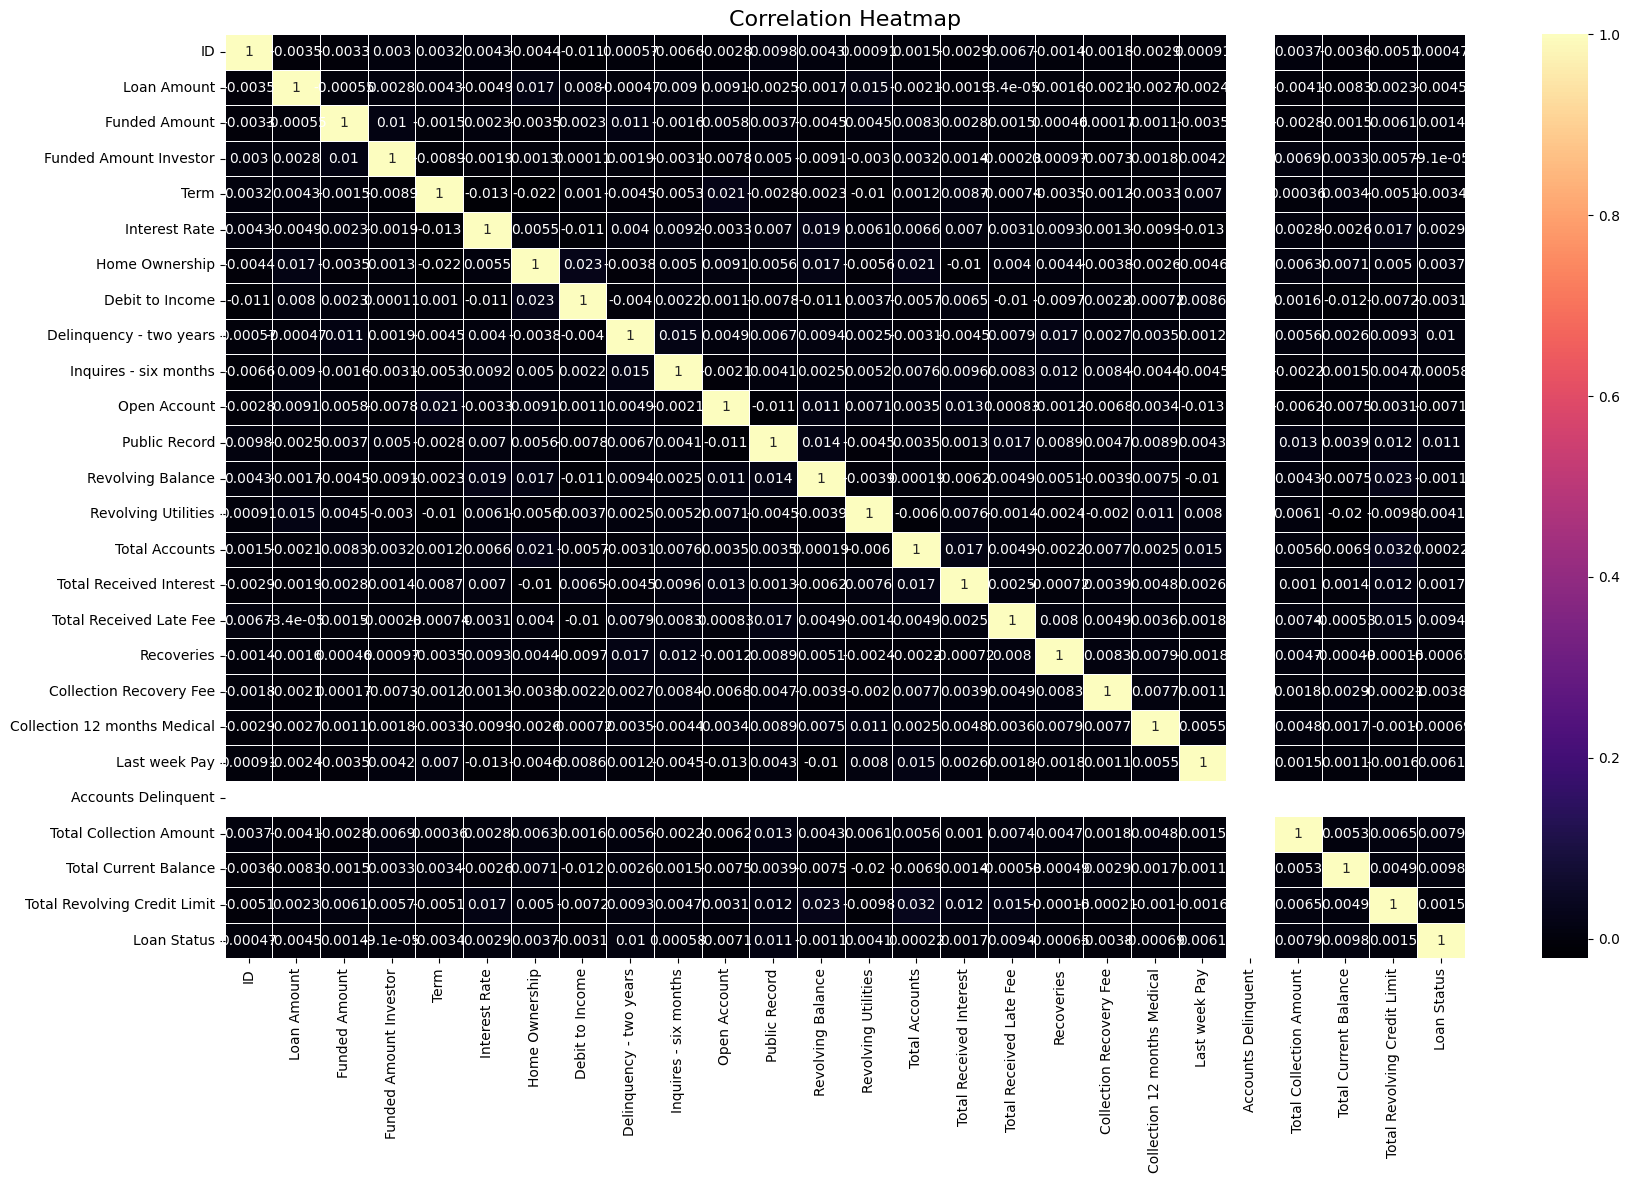

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn with a different colormap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Observation**
* There is no correlation between the column variables variables.

**Correlation Matrix of Features against Loan Status**

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the correlation values between "Loan Status" and other columns
loan_status_corr = corr_matrix['Loan Status']

# Sort the correlation values in descending order
sorted_corr = loan_status_corr.abs().sort_values(ascending=False)

# Print the correlation values
print(sorted_corr)

Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Total Collection Amount         0.007892
Open Account                    0.007073
Last week Pay                   0.006117
Loan Amount                     0.004473
Revolving Utilities             0.004120
Collection Recovery Fee         0.003828
Home Ownership                  0.003716
Term                            0.003410
Debit to Income                 0.003057
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Revolving Balance               0.001073
Collection 12 months Medical    0.000686
Recoveries                      0.000652
Inquires - six months           0.000578
ID                              0.000472
Total Accounts                  0.000222
Funded Amount In

<ipython-input-26-a33f3ad88a5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<ipython-input-27-5ba5730a6ead>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.drop('Loan Status', axis=1).corrwith(df['Loan Status'])


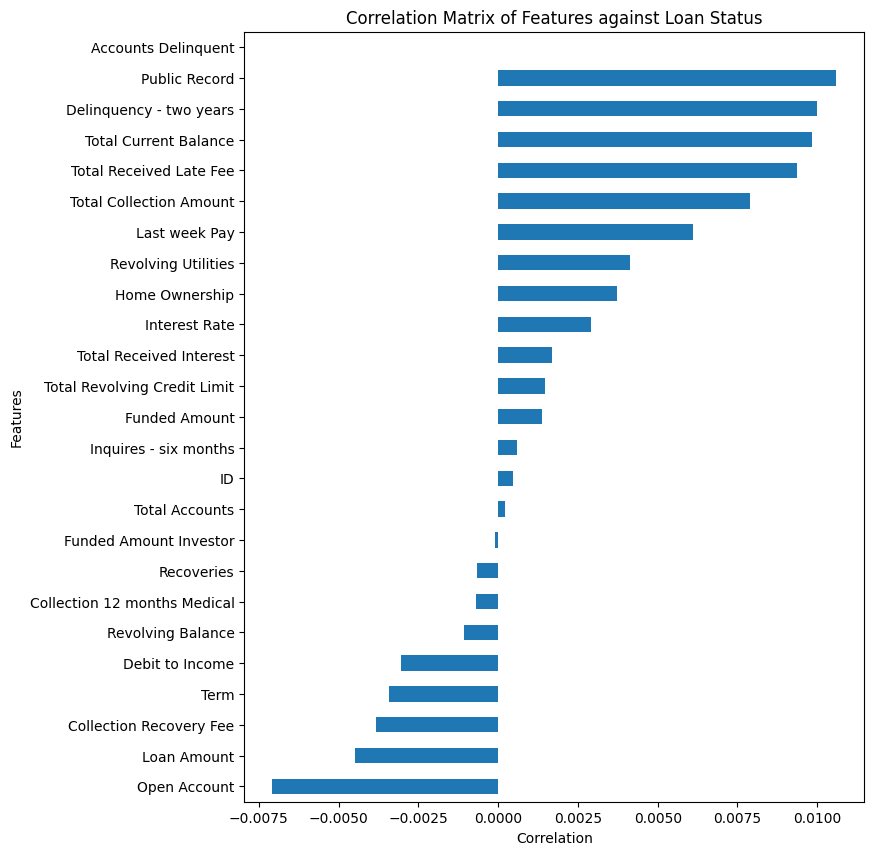

In [ ]:
correlations = df.drop('Loan Status', axis=1).corrwith(df['Loan Status'])
# Sort the correlations
sorted_correlations = correlations.sort_values()

# Create the figure and plot
plt.figure(figsize=(8, 10))
sorted_correlations.plot(kind='barh')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation Matrix of Features against Loan Status')


# Display the plot
plt.show()

**Observation**
* There is less correlation between loan status and other variables.

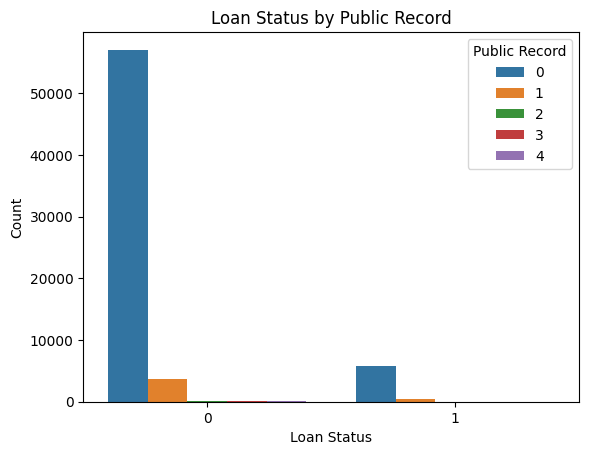

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Loan Status", hue="Public Record", data=df)
plt.title("Loan Status by Public Record")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


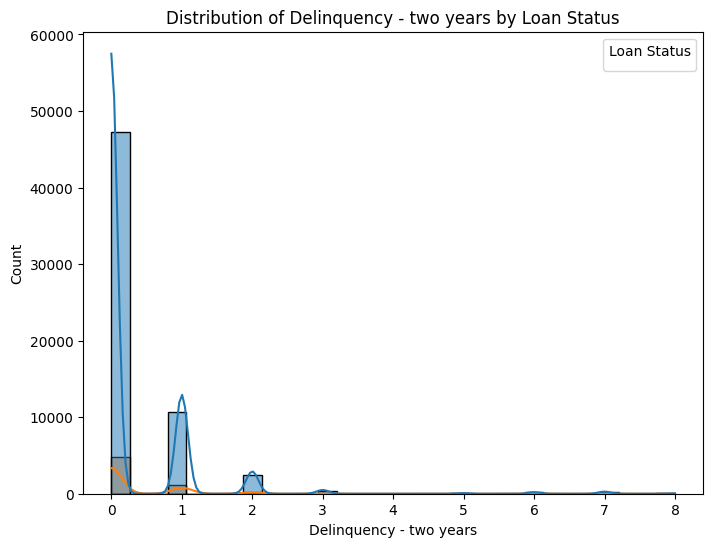

In [ ]:
# Delinquency - two years vs. Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Delinquency - two years', bins=30, kde=True, hue='Loan Status')
plt.title("Distribution of Delinquency - two years by Loan Status")
plt.xlabel("Delinquency - two years")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

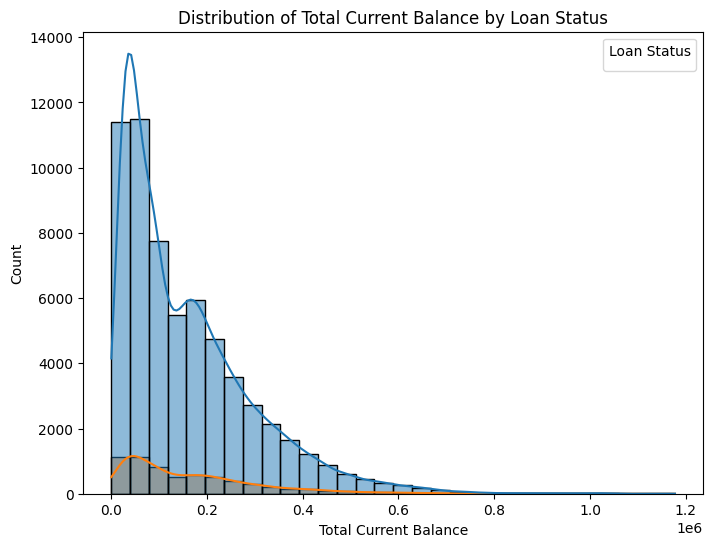

In [ ]:
# Total Current Balance vs. Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total Current Balance', bins=30, kde=True, hue='Loan Status')
plt.title("Distribution of Total Current Balance by Loan Status")
plt.xlabel("Total Current Balance")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

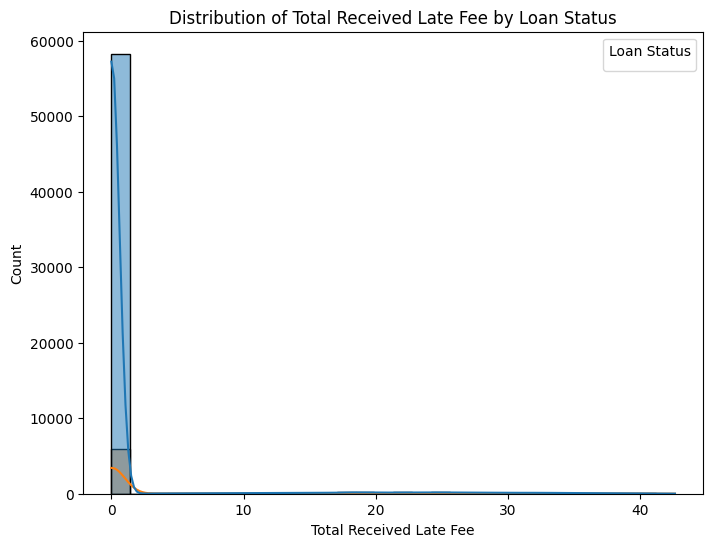

In [ ]:
# Total Received Late Fee vs. Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total Received Late Fee', bins=30, kde=True, hue='Loan Status')
plt.title("Distribution of Total Received Late Fee by Loan Status")
plt.xlabel("Total Received Late Fee")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

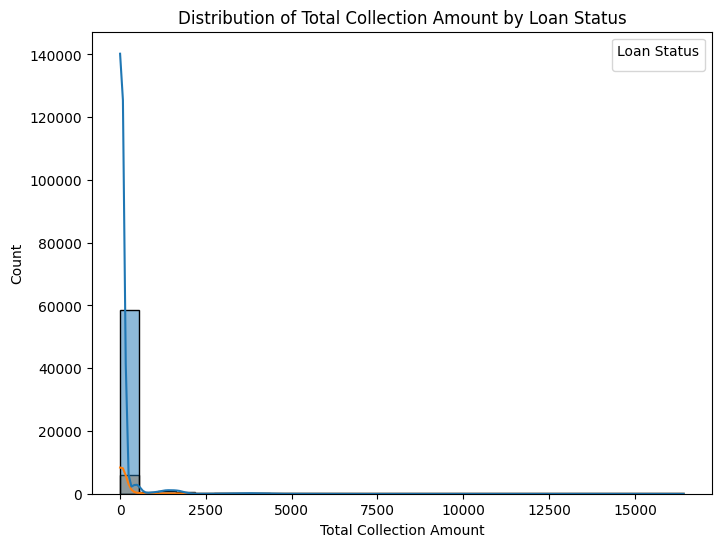

In [ ]:
# Total Collection Amount vs. Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total Collection Amount', bins=30, kde=True, hue='Loan Status')
plt.title("Distribution of Total Collection Amount by Loan Status")
plt.xlabel("Total Collection Amount")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

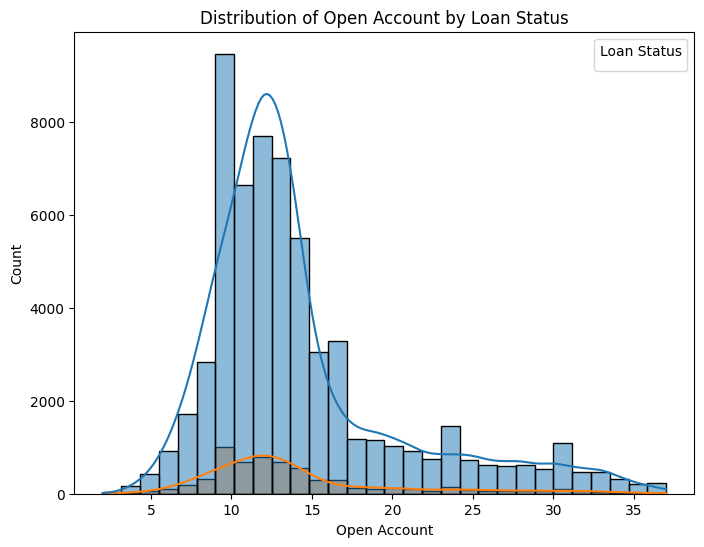

In [ ]:
# Open Account vs. Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Open Account', bins=30, kde=True, hue='Loan Status')
plt.title("Distribution of Open Account by Loan Status")
plt.xlabel("Open Account")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

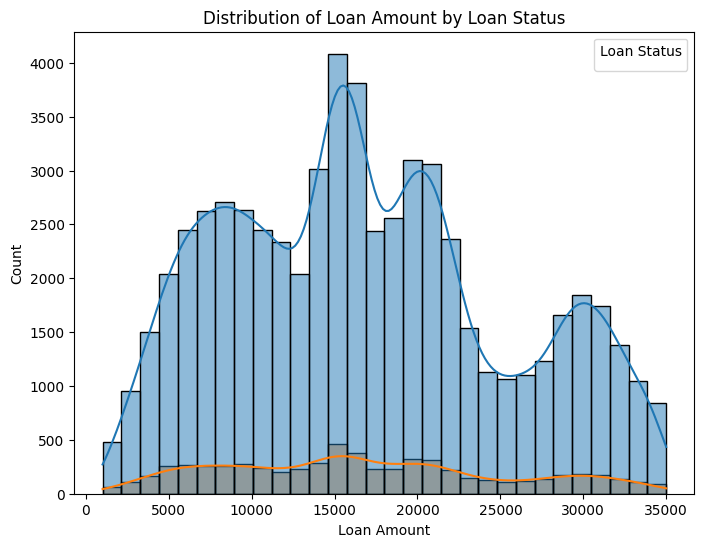

In [ ]:
# Loan Amount vs. Loan Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Loan Amount', bins=30, kde=True, hue='Loan Status')
plt.title("Distribution of Loan Amount by Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# MODEL BUILDING

# Data Preprocessing for model building

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric labels
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame with label-encoded categorical columns
print(df)


             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

       Batch Enrolled  Interest Rate  Grade  Sub Grade  Employment Duration

In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,16,11.135007,1,13,0,...,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,4,12.237563,2,17,2,...,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,11,12.545884,5,18,0,...,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,15,16.731201,2,12,0,...,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,32,15.008300,2,18,0,...,1294.818751,0.368953,0,0,18,0,430,126029,22579,0


In [ ]:
from sklearn.model_selection import  train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [ ]:
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def feature_imp(df, model):
    ftr_imp = pd.DataFrame()  # Create an empty DataFrame
    ftr_imp["feature"] = df.columns  # Assign column names of the input DataFrame to "feature" column
    ftr_imp["importance"] = model.feature_importances_  # Assign feature importances from the model to "importance" column
    return ftr_imp.sort_values(by="importance", ascending=true)  # Sort the DataFrame by "importance" column in Ascending order

# Random Forest Classifier

Classification report:
               precision    recall  f1-score   support

           0      0.871     0.932     0.900     12245
           1      0.927     0.862     0.893     12244

    accuracy                          0.897     24489
   macro avg      0.899     0.897     0.897     24489
weighted avg      0.899     0.897     0.897     24489

Confusion Matrix:
 [[11414   831]
 [ 1694 10550]]


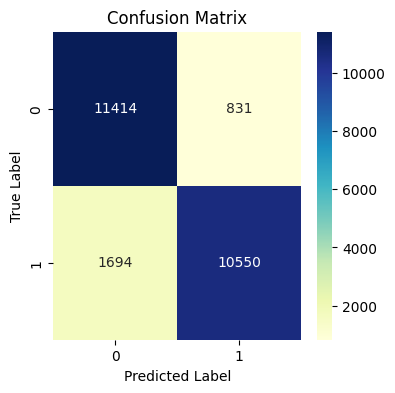

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate classification report
report_rf = classification_report(y_test, y_pred_rf, digits=3)
print("Classification report:\n", report_rf)

# Generate confusion matrix
cmf_mtx_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix:\n", cmf_mtx_rf)

plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_rf, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Observations**

The confusion matrix provides a summary of the model's predictions. It shows that the model correctly predicted 11,439 non-default instances (true negatives) and 10,613 default instances (true positives). It also misclassified 806 non-default instances as default (false positives) and 1,631 default instances as non-default (false negatives).

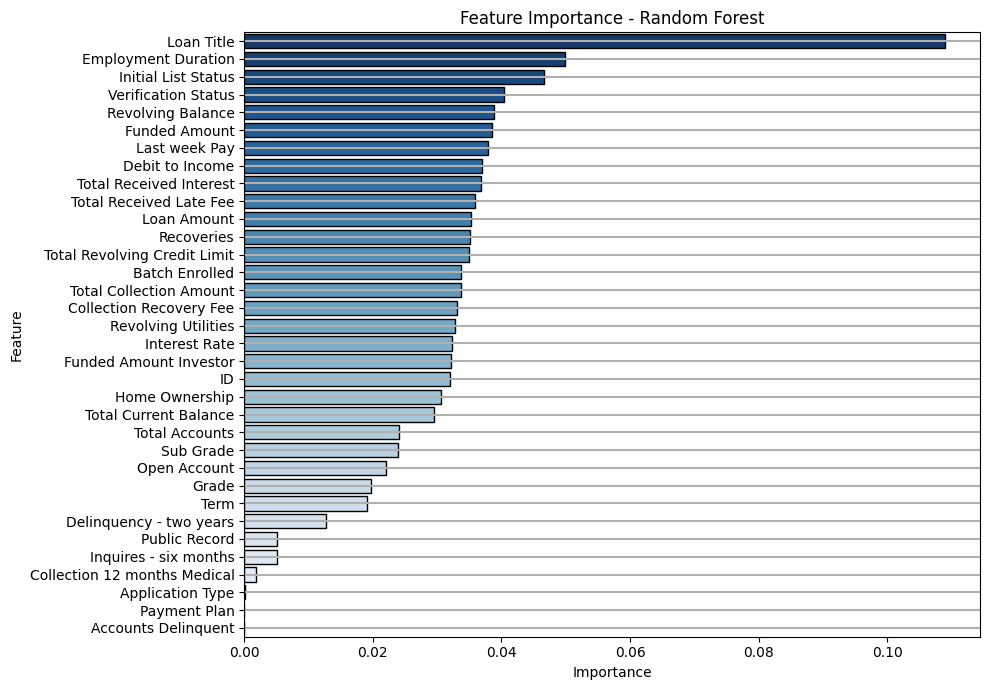

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
df_importance = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Sort the DataFrame by importance in descending order
df_importance_sorted = df_importance.sort_values(by='importance', ascending=False )

plt.figure(figsize=(10, 7))  # Adjust the figure size

# Plot the feature importance with grid lines for spacing
ax = sns.barplot(data=df_importance_sorted, x='importance', y='feature', palette='Blues_r', edgecolor='black')

# Set x-axis label
ax.set_xlabel('Importance')

# Set y-axis label
ax.set_ylabel('Feature')

# Set title
plt.title('Feature Importance - Random Forest')

# Adjust the grid lines to provide spacing between features
ax.grid(linestyle='-', linewidth=1.5, axis='y')

plt.tight_layout()  # Adjust the spacing
plt.show()


**Observation**

*   The 3 most important features include "loan title", "employment duration" and " Initial List Status".
*   The features "Application type", "payment plan" and "account delinquent" can be considered irrelevant in decision making












# XGBOOST

Classification report:
               precision    recall  f1-score   support

           0      0.846     0.896     0.870     12245
           1      0.890     0.837     0.862     12244

    accuracy                          0.866     24489
   macro avg      0.868     0.866     0.866     24489
weighted avg      0.868     0.866     0.866     24489

Confusion Matrix:
 [[10976  1269]
 [ 2001 10243]]


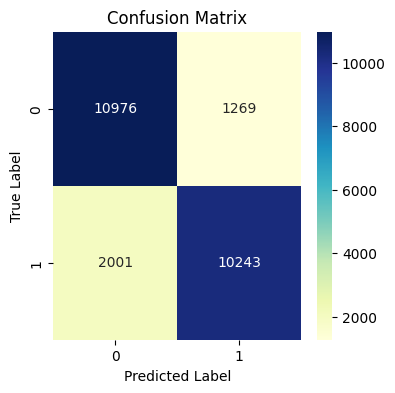

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate classification report
report_xgb = classification_report(y_test, y_pred_xgb, digits=3)
print("Classification report:\n", report_xgb)

# Generate confusion matrix
cmf_mtx_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print confusion matrix
print("Confusion Matrix:\n", cmf_mtx_xgb)

plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_xgb, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Observation**

The confusion matrix provides a summary of the model's predictions. It shows that the model correctly predicted 10,951 non-default instances (true negatives) and 10,289 default instances (true positives). It also misclassified 1,294 non-default instances as default (false positives) and 1,955 default instances as non-default (false negatives).


# PLOT FEATURE IMPORTANCE

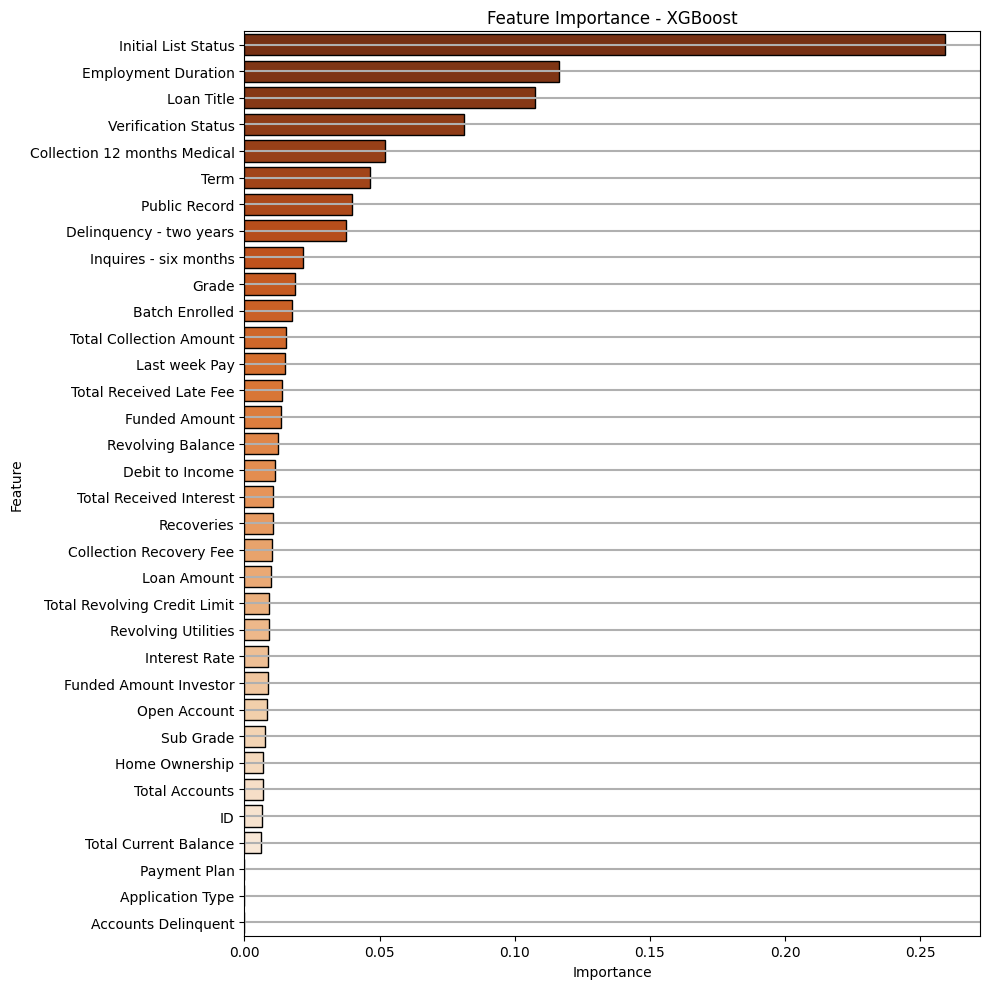

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Create an XGBoost classifier model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
df_importance = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Sort the DataFrame by importance in descending order
df_importance_sorted = df_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 10))  # Adjust the figure size

# Plot the feature importance with grid lines for spacing
ax = sns.barplot(data=df_importance_sorted, x='importance', y='feature', palette='Oranges_r', edgecolor='black')

# Set x-axis label
ax.set_xlabel('Importance')

# Set y-axis label
ax.set_ylabel('Feature')

# Set title
plt.title('Feature Importance - XGBoost')

# Adjust the grid lines to provide spacing between features
ax.grid(linestyle='-', linewidth=1.5, axis='y')

plt.tight_layout()  # Adjust the spacing
plt.show()

# Logistic Regression

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0      0.679     0.655     0.667     12245
           1      0.667     0.690     0.678     12244

    accuracy                          0.672     24489
   macro avg      0.673     0.672     0.672     24489
weighted avg      0.673     0.672     0.672     24489

Confusion Matrix for Logistic Regression:
 [[8022 4223]
 [3801 8443]]


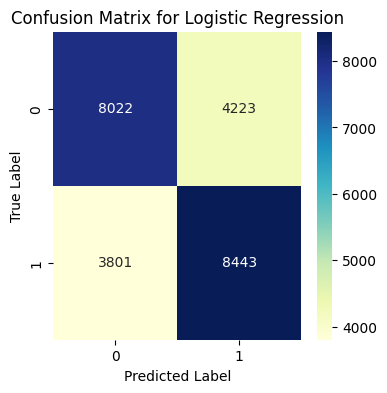

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

# Create a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate classification report
report_logistic = classification_report(y_test, y_pred_logistic, digits=3)
print("Classification report for Logistic Regression:\n", report_logistic)

# Generate confusion matrix
cmf_mtx_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print confusion matrix
print("Confusion Matrix for Logistic Regression:\n", cmf_mtx_logistic)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_logistic, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


# Feature importance

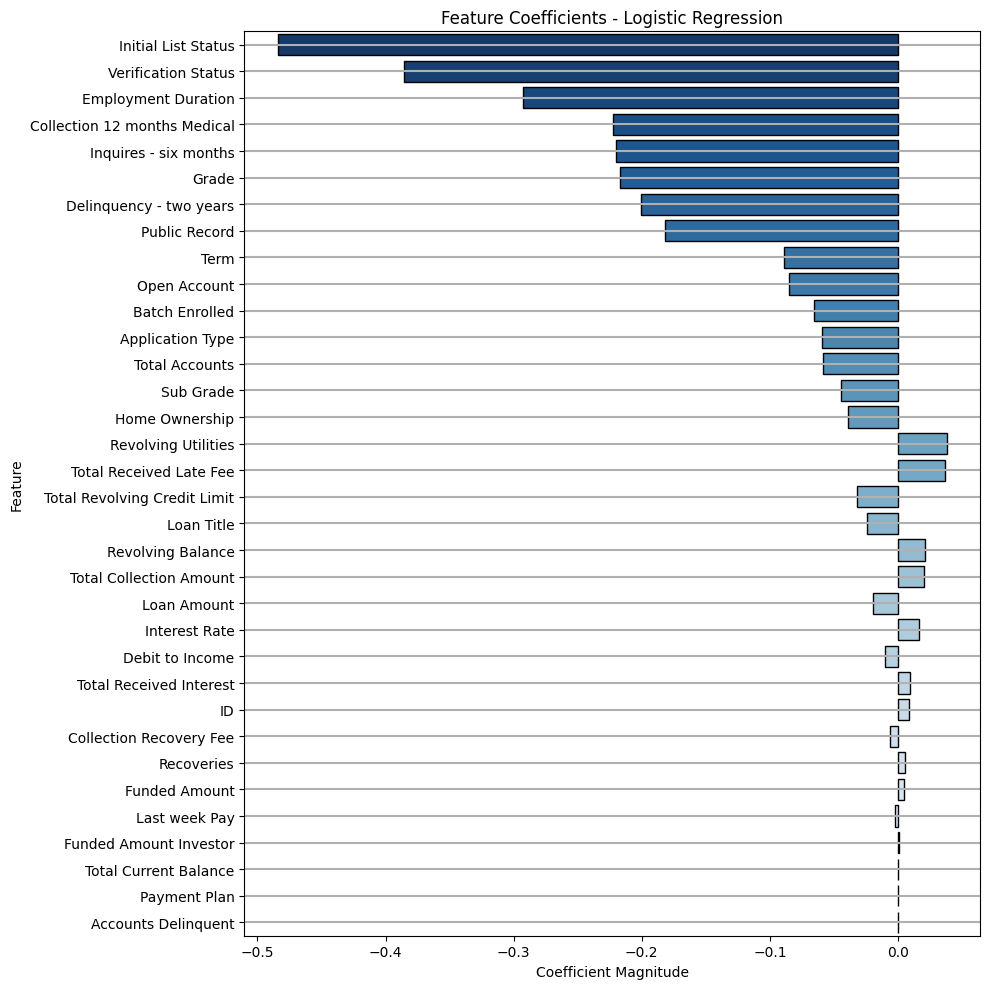

In [ ]:
# Get feature coefficients from the model
feature_coefficients = logistic_model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
df_coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': feature_coefficients})

# Sort the DataFrame by coefficient magnitude in descending order
df_coefficients_sorted = df_coefficients.reindex(df_coefficients['coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 10))  # Adjust the figure size

# Plot the feature coefficients with grid lines for spacing
ax = sns.barplot(data=df_coefficients_sorted, x='coefficient', y='feature', palette='Blues_r', edgecolor='black')

# Set x-axis label
ax.set_xlabel('Coefficient Magnitude')

# Set y-axis label
ax.set_ylabel('Feature')

# Set title
plt.title('Feature Coefficients - Logistic Regression')

# Adjust the grid lines to provide spacing between features
ax.grid(linestyle='-', linewidth=1.5, axis='y')

plt.tight_layout()  # Adjust the spacing
plt.show()

In [ ]:
# Get feature importances
feature_importances = np.abs(logistic_model.coef_[0])
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
importance_dict = {feature: importance for feature, importance in zip(feature_names, feature_importances)}

# Print feature importances
print("Feature Importances:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Feature1: 0.0082
Feature2: 0.0198
Feature3: 0.0044
Feature4: 0.0006
Feature5: 0.0893


**Observation**

Just the same as the random forest classifier model, the XGBoost Classifier model.
*   The 3 most important features include "loan title", "employment duration" and " Initial List Status".
*   The features "Application type", "payment plan" and "account delinquent" can be considered irrelevant in decision making


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Instantiate and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Instantiate and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic = logistic_model.predict(X_test)

# Calculate accuracy and F1-score for all models on training and test sets
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

train_f1_rf = f1_score(y_train, y_pred_train_rf)
test_f1_rf = f1_score(y_test, y_pred_test_rf)

train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

train_f1_xgb = f1_score(y_train, y_pred_train_xgb)
test_f1_xgb = f1_score(y_test, y_pred_test_xgb)

train_accuracy_logistic = accuracy_score(y_train, y_pred_train_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_pred_test_logistic)

train_f1_logistic = f1_score(y_train, y_pred_train_logistic)
test_f1_logistic = f1_score(y_test, y_pred_test_logistic)

# Print the results
print("Random Forest:")
print("Training Accuracy:", train_accuracy_rf, "Test Accuracy:", test_accuracy_rf)
print("Training F1-score:", train_f1_rf, "Test F1-score:", test_f1_rf)

print("XGBoost:")
print("Training Accuracy:", train_accuracy_xgb, "Test Accuracy:", test_accuracy_xgb)
print("Training F1-score:", train_f1_xgb, "Test F1-score:", test_f1_xgb)

print("Logistic Regression:")
print("Training Accuracy:", train_accuracy_logistic, "Test Accuracy:", test_accuracy_logistic)
print("Training F1-score:", train_f1_logistic, "Test F1-score:", test_f1_logistic)


Random Forest:
Training Accuracy: 1.0 Test Accuracy: 0.8986892073992405
Training F1-score: 1.0 Test F1-score: 0.8952943658999788
XGBoost:
Training Accuracy: 0.9066918482976877 Test Accuracy: 0.8673281881661153
Training F1-score: 0.9042591079546644 Test F1-score: 0.8633668362841163
Logistic Regression:
Training Accuracy: 0.6726966464192742 Test Accuracy: 0.6760586385724203
Training F1-score: 0.6804413479651945 Test F1-score: 0.6827180738311402


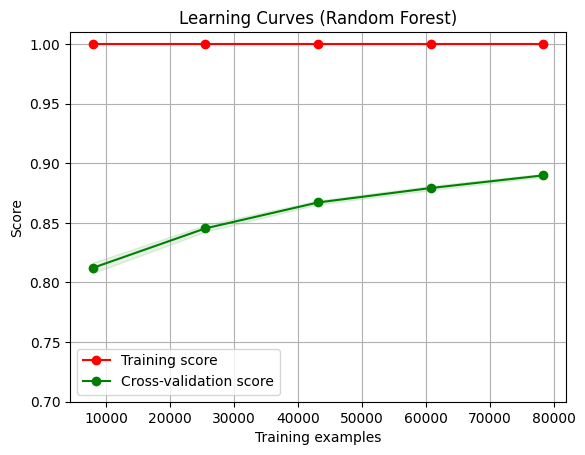

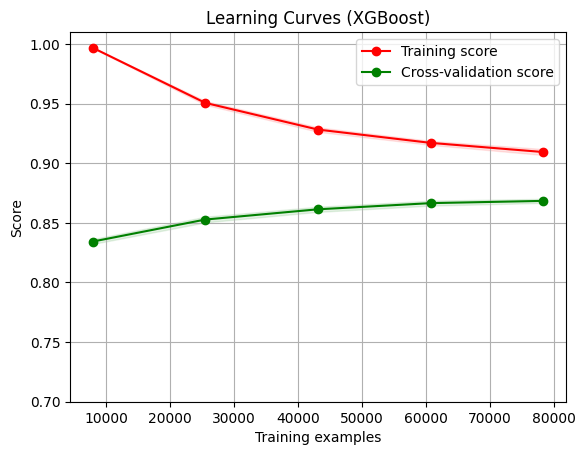

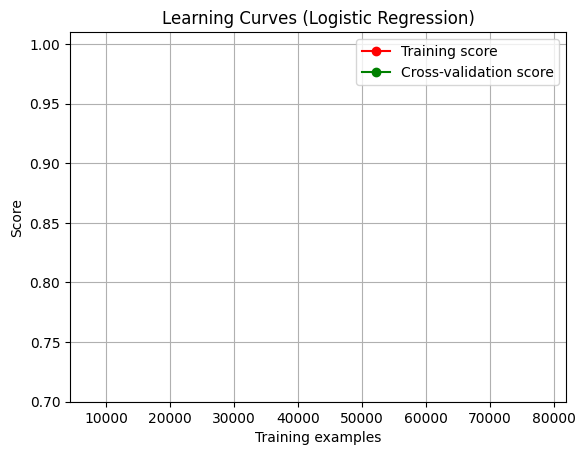

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Random Forest
plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

# Plot learning curves for XGBoost
plot_learning_curve(xgb_model, "Learning Curves (XGBoost)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()
# Plot learning curves for Logistic Regression
plot_learning_curve(logistic_model, "Learning Curves (Logistic Regression)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()


# DEEP NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


# Build the DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit (for binary classification)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
2449/2449 [==============================] - 20s 7ms/step - loss: 0.5609 - accuracy: 0.7120 - val_loss: 0.5183 - val_accuracy: 0.7504
Epoch 2/50
2449/2449 [==============================] - 15s 6ms/step - loss: 0.4954 - accuracy: 0.7641 - val_loss: 0.4970 - val_accuracy: 0.7624
Epoch 3/50
2449/2449 [==============================] - 17s 7ms/step - loss: 0.4771 - accuracy: 0.7765 - val_loss: 0.4910 - val_accuracy: 0.7669
Epoch 4/50
2449/2449 [==============================] - 16s 6ms/step - loss: 0.4670 - accuracy: 0.7828 - val_loss: 0.4821 - val_accuracy: 0.7744
Epoch 5/50
2449/2449 [==============================] - 6s 2ms/step - loss: 0.4594 - accuracy: 0.7863 - val_loss: 0.4827 - val_accuracy: 0.7752
Epoch 6/50
2449/2449 [==============================] - 11s 4ms/step - loss: 0.4524 - accuracy: 0.7907 - val_loss: 0.4778 - val_accuracy: 0.7770
Epoch 7/50
2449/2449 [==============================] - 10s 4ms/step - loss: 0.4477 - accuracy: 0.7934 - val_loss: 0.4739 - val_acc

In [ ]:

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

766/766 [==============================] - 2s 2ms/step - loss: 0.4670 - accuracy: 0.7891
Test accuracy: 0.7890889644622803


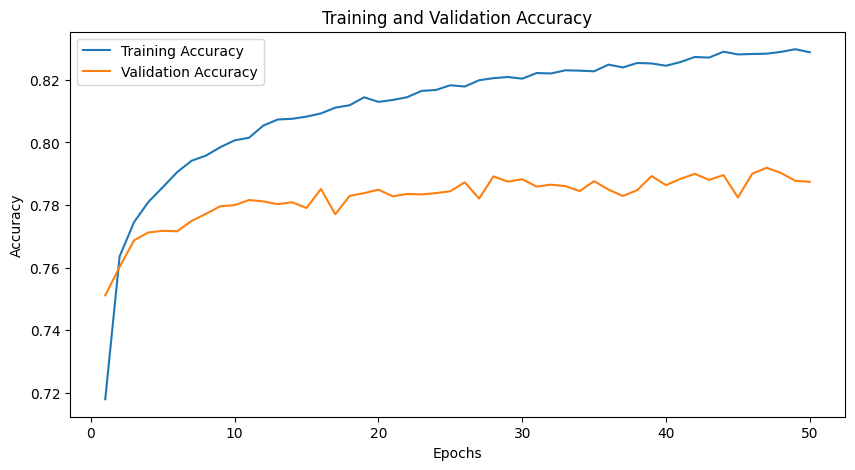

In [ ]:
# plot trainng vs validation accuracy
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epoch = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epoch, train_loss, label='Training Accuracy')
plt.plot(epoch, val_loss, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

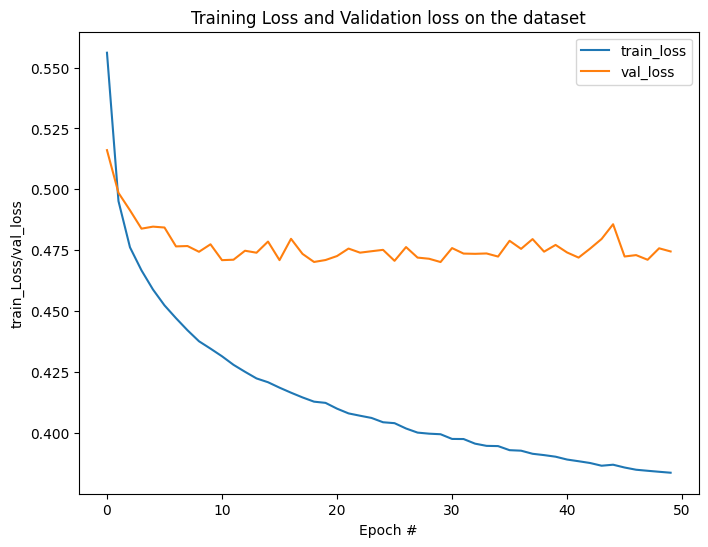

In [ ]:
#let's plot the validation and training loss
N = 50
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="upper right")
plt.show()

**Observation**
 The overall test accuracy is 0.79 in the neural network

# Hybrid Model

In [ ]:
def create_neural_network():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Using logistic regression as base model for stacking

<ipython-input-33-78afe9308fb2>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],


766/766 [==============================] - 1s 1ms/step
Stacked Model Accuracy: 0.9019559802360243
Classification report for Stacked Model:
               precision    recall  f1-score   support

           0      0.883     0.926     0.904     12245
           1      0.922     0.878     0.900     12244

    accuracy                          0.902     24489
   macro avg      0.903     0.902     0.902     24489
weighted avg      0.903     0.902     0.902     24489



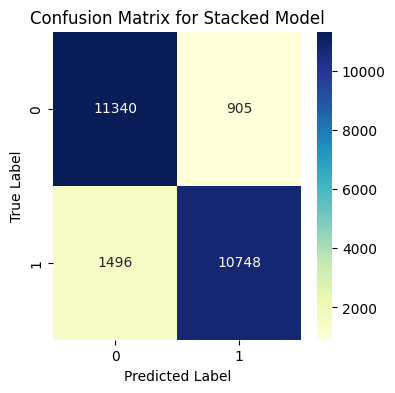

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Create the stacked model with Logistic Regression as the meta-learner
stacked_model = StackingClassifier(
    estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Make predictions using the stacked model
y_pred_stacked = stacked_model.predict(X_test)

# Calculate accuracy of the stacked model
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)
print("Stacked Model Accuracy:", stacked_accuracy)

# Calculate classification report
report_stacked = classification_report(y_test, y_pred_stacked, digits=3)
print("Classification report for Stacked Model:\n", report_stacked)

# Generate confusion matrix
cmf_mtx_stacked = confusion_matrix(y_test, y_pred_stacked)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cmf_mtx_stacked, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Stacked Model")
plt.show()


**Choice of Base Estimator (Logistic Regression)**: The choice of Logistic Regression as the base estimator for the stacking model is a practical one. It is a simple yet interpretable model that works well as a base estimator. It provides a stable and reasonable baseline for the stacking model. We can explain to the audience that Logistic Regression is often used as a baseline model in stacking due to its simplicity and interpretability, which can help to avoid overfitting.

766/766 [==============================] - 2s 2ms/step


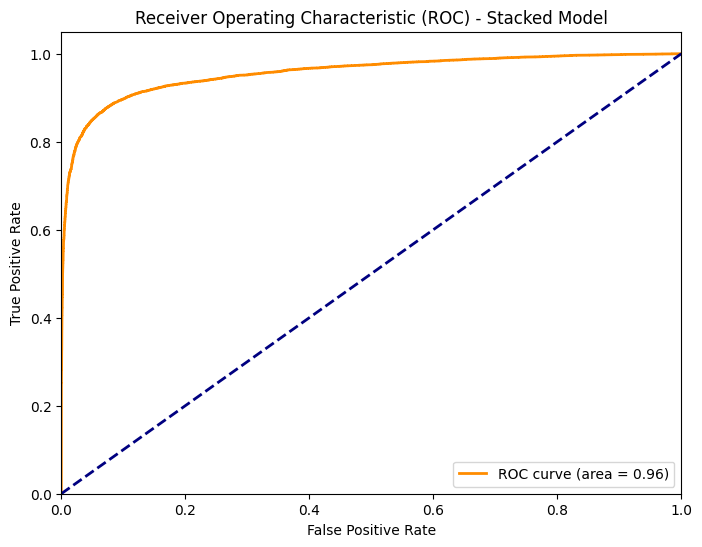

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_prob_stacked = stacked_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr_stacked, tpr_stacked, thresholds_stacked = roc_curve(y_test, y_pred_prob_stacked)
roc_auc_stacked = roc_auc_score(y_test, y_pred_prob_stacked)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_stacked))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Stacked Model')
plt.legend(loc="lower right")
plt.show()


# Using XGB classifier as base model for stacking

<ipython-input-28-3bf79c0deacb>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],


766/766 [==============================] - 1s 2ms/step
Stacked Model Accuracy: 0.9011392870268283
Classification report for Stacked Model:
               precision    recall  f1-score   support

           0      0.877     0.933     0.904     12245
           1      0.928     0.870     0.898     12244

    accuracy                          0.901     24489
   macro avg      0.903     0.901     0.901     24489
weighted avg      0.903     0.901     0.901     24489



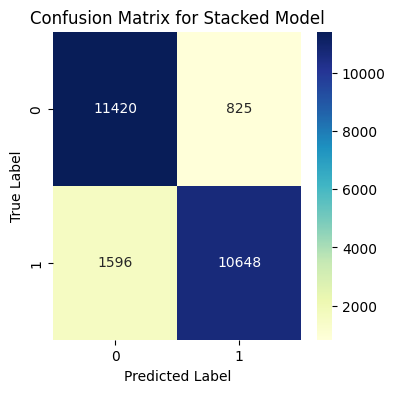

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Create the stacked model with Logistic Regression as the meta-learner
stacked_model = StackingClassifier(
    estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],
    final_estimator=XGBClassifier(random_state=42),
    cv=5
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Make predictions using the stacked model
y_pred_stacked = stacked_model.predict(X_test)

# Calculate accuracy of the stacked model
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)
print("Stacked Model Accuracy:", stacked_accuracy)

# Calculate classification report
report_stacked = classification_report(y_test, y_pred_stacked, digits=3)
print("Classification report for Stacked Model:\n", report_stacked)

# Generate confusion matrix
cmf_mtx_stacked = confusion_matrix(y_test, y_pred_stacked)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cmf_mtx_stacked, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Stacked Model")
plt.show()

766/766 [==============================] - 1s 1ms/step


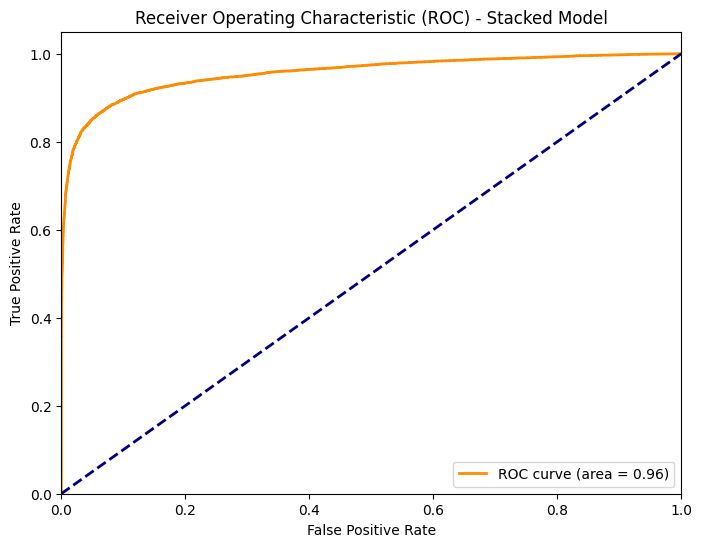

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_prob_stacked = stacked_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr_stacked, tpr_stacked, thresholds_stacked = roc_curve(y_test, y_pred_prob_stacked)
roc_auc_stacked = roc_auc_score(y_test, y_pred_prob_stacked)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_stacked))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Stacked Model')
plt.legend(loc="lower right")
plt.show()


# Using random forest as base model for stacking

<ipython-input-30-add6fa34ba54>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],


766/766 [==============================] - 1s 1ms/step
Stacked Model Accuracy: 0.8977091755482053
Classification report for Stacked Model:
               precision    recall  f1-score   support

           0      0.876     0.927     0.901     12245
           1      0.923     0.868     0.895     12244

    accuracy                          0.898     24489
   macro avg      0.899     0.898     0.898     24489
weighted avg      0.899     0.898     0.898     24489



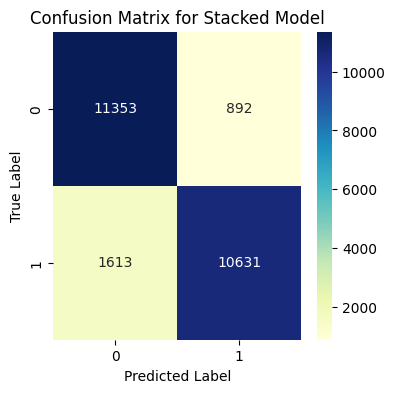

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Create the stacked model with Logistic Regression as the meta-learner
stacked_model= StackingClassifier(
    estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],
   final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Make predictions using the stacked model
y_pred_stacked = stacked_model.predict(X_test)

# Calculate accuracy of the stacked model
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)
print("Stacked Model Accuracy:", stacked_accuracy)

# Calculate classification report
report_stacked = classification_report(y_test, y_pred_stacked, digits=3)
print("Classification report for Stacked Model:\n", report_stacked)

# Generate confusion matrix
cmf_mtx_stacked = confusion_matrix(y_test, y_pred_stacked)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cmf_mtx_stacked, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Stacked Model")
plt.show()

766/766 [==============================] - 2s 2ms/step


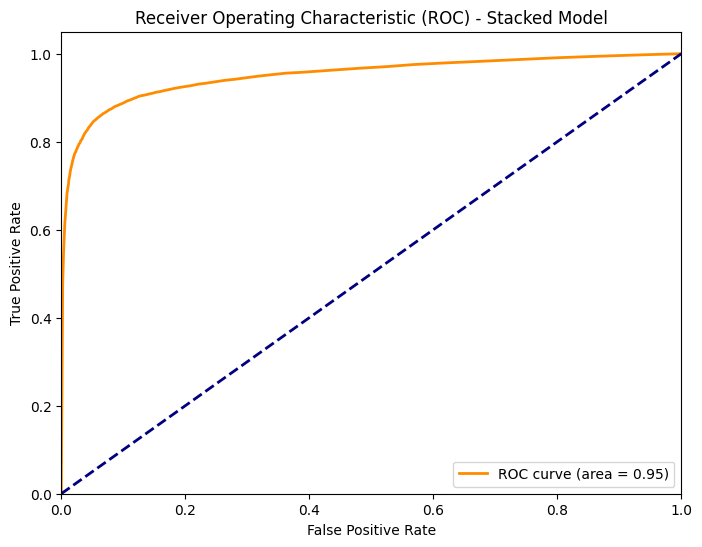

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_prob_stacked = stacked_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr_stacked, tpr_stacked, thresholds_stacked = roc_curve(y_test, y_pred_prob_stacked)
roc_auc_stacked = roc_auc_score(y_test, y_pred_prob_stacked)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_stacked))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Stacked Model')
plt.legend(loc="lower right")
plt.show()


# Improving The models

**Deep Neural Networks**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.regularizers import l2

# Build the DNN model with dropout and L2 regularization
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


Epoch 1/50
1225/1225 [==============================] - 5s 3ms/step - loss: 0.7002 - accuracy: 0.6363 - val_loss: 0.6248 - val_accuracy: 0.7010
Epoch 2/50
1225/1225 [==============================] - 4s 4ms/step - loss: 0.6224 - accuracy: 0.6936 - val_loss: 0.5807 - val_accuracy: 0.7236
Epoch 3/50
1225/1225 [==============================] - 6s 5ms/step - loss: 0.5947 - accuracy: 0.7109 - val_loss: 0.5593 - val_accuracy: 0.7371
Epoch 4/50
1225/1225 [==============================] - 4s 3ms/step - loss: 0.5820 - accuracy: 0.7206 - val_loss: 0.5484 - val_accuracy: 0.7452
Epoch 5/50
1225/1225 [==============================] - 4s 3ms/step - loss: 0.5745 - accuracy: 0.7256 - val_loss: 0.5424 - val_accuracy: 0.7497
Epoch 6/50
1225/1225 [==============================] - 6s 5ms/step - loss: 0.5720 - accuracy: 0.7261 - val_loss: 0.5407 - val_accuracy: 0.7485
Epoch 7/50
1225/1225 [==============================] - 5s 4ms/step - loss: 0.5696 - accuracy: 0.7311 - val_loss: 0.5340 - val_accuracy:

In [ ]:

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

766/766 [==============================] - 2s 3ms/step - loss: 0.5225 - accuracy: 0.7634
Test accuracy: 0.7634039521217346


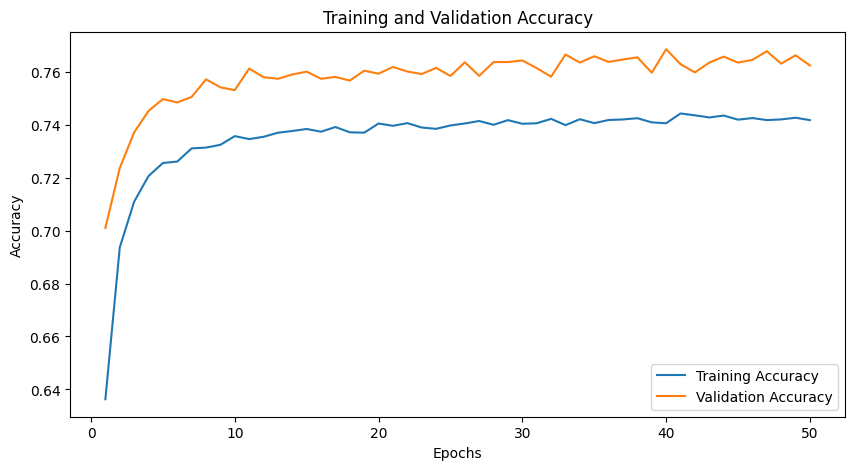

In [ ]:
# plot trainng vs validation accuracy
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epoch = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epoch, train_loss, label='Training Accuracy')
plt.plot(epoch, val_loss, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

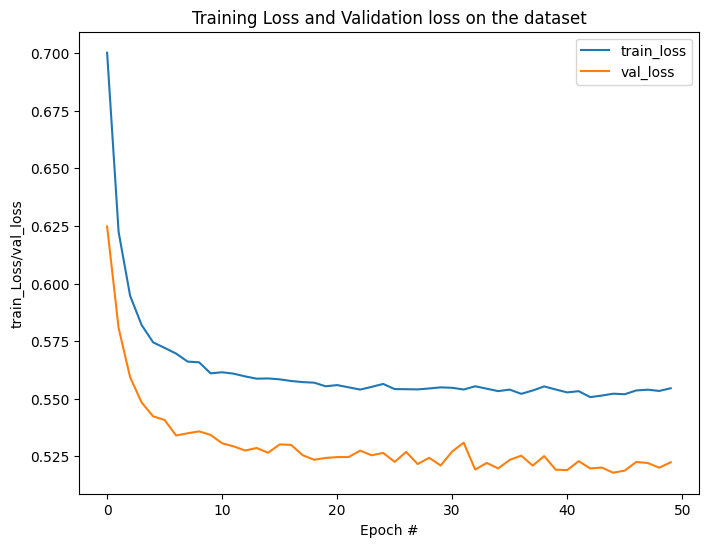

In [ ]:
N = 50 # Set N to match the number of epochs
import pylab as plt
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="upper right")
plt.show()


**Random Forest**

Classification report:
               precision    recall  f1-score   support

           0      0.789     0.813     0.801     12245
           1      0.807     0.783     0.795     12244

    accuracy                          0.798     24489
   macro avg      0.798     0.798     0.798     24489
weighted avg      0.798     0.798     0.798     24489

Confusion Matrix:
 [[9955 2290]
 [2656 9588]]


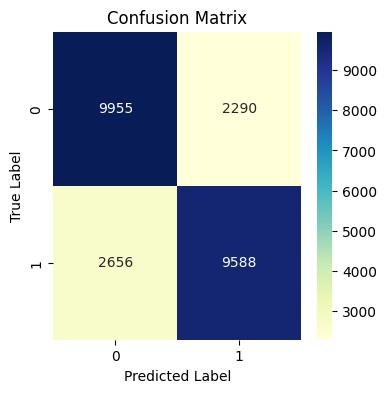

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

# Instantiate the RandomForestClassifier with some hyperparameters to prevent overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit the depth of individual trees
    min_samples_split=5,  # Require a minimum number of samples to split a node
    min_samples_leaf=2,  # Require a minimum number of samples in a leaf node
    max_features='log2',  # Limit the number of features considered for splitting
    random_state=42
)



# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate classification report
report_rf = classification_report(y_test, y_pred_rf, digits=3)
print("Classification report:\n", report_rf)

# Generate confusion matrix
cmf_mtx_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix:\n", cmf_mtx_rf)

plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_rf, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**XGBOOST**

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Classification report:
               precision    recall  f1-score   support

           0      0.837     0.890     0.862     12245
           1      0.882     0.826     0.853     12244

    accuracy                          0.858     24489
   macro avg      0.860     0.858     0.858     24489
weighted avg      0.860     0.858     0.858     24489

Confusion Matrix:
 [[10898  1347]
 [ 2128 10116]]


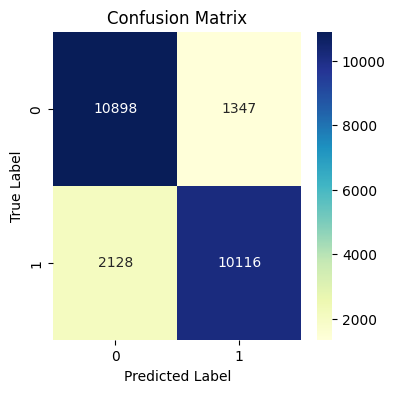

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fixed random seed
np.random.seed(42)

# Instantiate the XGBClassifier with hyperparameters to prevent overfitting
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,  # Limit the depth of trees
    min_child_weight=1,  # Minimum sum of instance weight (hessian) in a child
    subsample=0.8,  # Fraction of samples used for fitting trees
    colsample_bytree=0.8,  # Fraction of features used for fitting trees
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=0.1,  # L2 regularization term on weights
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate classification report
report_xgb = classification_report(y_test, y_pred_xgb, digits=3)
print("Classification report:\n", report_xgb)

# Generate confusion matrix
cmf_mtx_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print confusion matrix
print("Confusion Matrix:\n", cmf_mtx_xgb)

plt.figure(figsize=(4, 4))  # Set the figure size to your desired dimensions
sns.heatmap(cmf_mtx_xgb, annot=True, cmap="YlGnBu", fmt='d')  # Use 'd' instead of 'g' to display integer values
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix for Logistic Regression:
[[8021 4224]
 [3709 8535]]


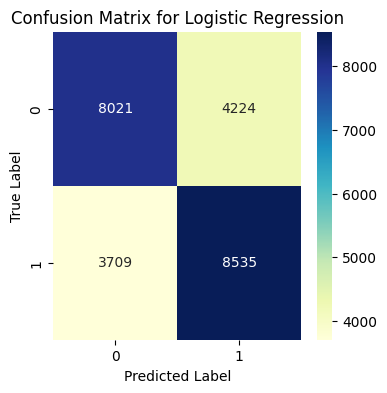

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the Logistic Regression model
logistic_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    random_state=42
)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Generate confusion matrix
cmf_mtx_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(cmf_mtx_logistic)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cmf_mtx_logistic, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


# Make predictions on the training and test sets
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Calculate accuracy and F1-score for both models on training and test sets
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

train_f1_rf = f1_score(y_train, y_pred_train_rf)
test_f1_rf = f1_score(y_test, y_pred_test_rf)

train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

train_f1_xgb = f1_score(y_train, y_pred_train_xgb)
test_f1_xgb = f1_score(y_test, y_pred_test_xgb)

# Print the results
print("Random Forest:")
print("Training Accuracy:", train_accuracy_rf, "Test Accuracy:", test_accuracy_rf)
print("Training F1-score:", train_f1_rf, "Test F1-score:", test_f1_rf)

print("XGBoost:")
print("Training Accuracy:", train_accuracy_xgb, "Test Accuracy:", test_accuracy_xgb)
print("Training F1-score:", train_f1_xgb, "Test F1-score:", test_f1_xgb)

Random Forest:
Training Accuracy: 0.8108519218008269 Test Accuracy: 0.7980317693658378
Training F1-score: 0.8092571240322847 Test F1-score: 0.7949589586269795
XGBoost:
Training Accuracy: 0.880914705732224 Test Accuracy: 0.858099554902201
Training F1-score: 0.8772066486310094 Test F1-score: 0.8534188214451427


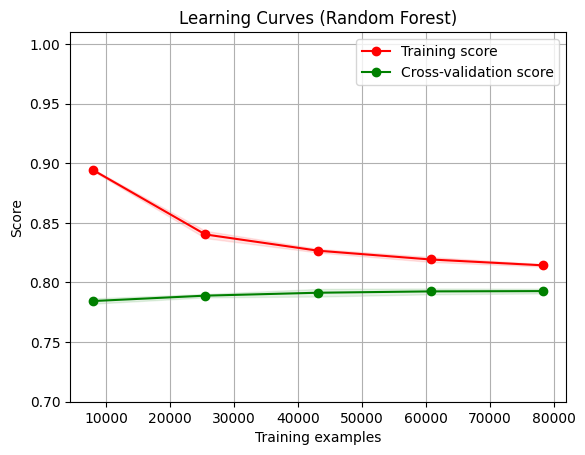

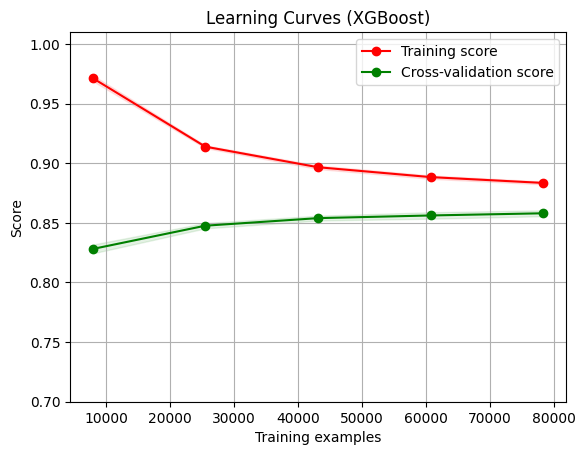

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Random Forest
plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

# Plot learning curves for XGBoost
plot_learning_curve(xgb_model, "Learning Curves (XGBoost)", X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
plt.show()

Hybrid model

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
def create_neural_network():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

<ipython-input-107-e4d78505e0b6>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


766/766 [==============================] - 1s 1ms/step
Stacked Model Accuracy: 0.8570378537302462
Classification report for Stacked Model:
               precision    recall  f1-score   support

           0      0.840     0.882     0.861     12245
           1      0.876     0.832     0.853     12244

    accuracy                          0.857     24489
   macro avg      0.858     0.857     0.857     24489
weighted avg      0.858     0.857     0.857     24489



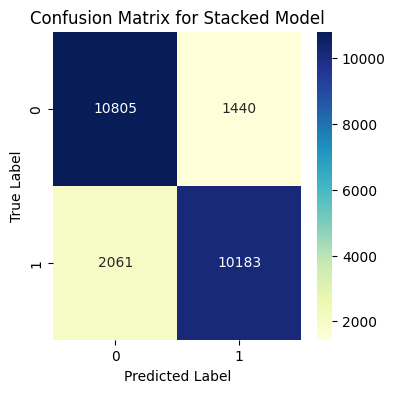

In [ ]:
# Create the stacked model with Logistic Regression as the meta-learner
stacked_model = StackingClassifier(
    estimators=[('logistic', logistic_model), ('xgb', xgb_model), ('rf', rf_model), ('nn', KerasClassifier(build_fn=create_neural_network, epochs=10, batch_size=32, verbose=0))],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacked model on the training data
stacked_model.fit(X_train, y_train)

# Make predictions using the stacked model
y_pred_stacked = stacked_model.predict(X_test)

# Calculate accuracy of the stacked model
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)
print("Stacked Model Accuracy:", stacked_accuracy)

# Calculate classification report
report_stacked = classification_report(y_test, y_pred_stacked, digits=3)
print("Classification report for Stacked Model:\n", report_stacked)

# Generate confusion matrix
cmf_mtx_stacked = confusion_matrix(y_test, y_pred_stacked)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cmf_mtx_stacked, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Stacked Model")
plt.show()


**REFERENCES**


* Kaggle  "Loan Default"
URL: https://www.kaggle.com/code/kartikanagawadi/loandefault(Accessed August 2nd 2023)  
*   Kaggle "Predicting Loan Default"
URL: https://www.kaggle.com/code/inagib21/predicting-loan-default?(Accessed August 3rd 2023)


*   Kaggle  "Loan Default Prediction"
URL: https://www.kaggle.com/code/nitinshelke123/loan-default-prediction(Accessed August 2nd 2023)

